In [1]:
import os
from Evaluation import Evaluation
from DataModel import DataModel

import warnings
warnings.filterwarnings('ignore')

In [2]:
logFolder = os.path.join(os.getcwd(), 'IEMOCAP_ModelLog')
resultFolder = os.path.join(os.getcwd(), 'IEMOCAP_TrainedModel')

# Data Model

In [3]:
labelsToInclude = ['Anger', 'Disgust', 'Excitement', 'Fear', 'Frustration', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

iemocapAll = DataModel(labelsToInclude=labelsToInclude)
iemocapAll.extractIEMOCAPData()
iemocapAll.processData()

Loading and Extracting IEMOCAP Data...
    Loaded and Extracted  7529 data

Data Extration Completed
    Number of data: 7529
      Neutral     : 1708
      Frustration : 1849
      Anger       : 1103
      Sadness     : 1084
      Happiness   : 595
      Excitement  : 1041
      Surprise    : 107
      Disgust     : 2
      Fear        : 40
      Boredom     : 0

Splitting data...
Train Test Split Completed
    Training Size : 6029
    Testing Size  : 1500

Split or Add Padding for training data:
    Split Duration  : 8
    Ignore Duration : 1
Processing...
    Processed  6539 data split and padding
Data Splitting and Padding For Training Completed!

Processing training data to Mel Spectrogram...
    Processed  6539 Mel Spectrogram
Mel Spectrogram Processing For Training Completed
    Shape of training images: (6539, 256, 256, 1)

Processing training labels...
Label Processing For Training Completed

Split or Add Padding for testing data
    Split Duration  : 8
    Ignore Duration : 1

In [4]:
labelsToInclude = ['Anger', 'Frustration', 'Happiness', 'Neutral',  'Sadness']
mergeHappinessExcitement = True

iemocap5Labels = DataModel(labelsToInclude=labelsToInclude, mergeHappinessExcitement=mergeHappinessExcitement)
iemocap5Labels.extractIEMOCAPData()
iemocap5Labels.processData()

Loading and Extracting IEMOCAP Data...
    Loaded and Extracted  7380 data

Data Extration Completed
    Number of data: 7380
      Neutral     : 1708
      Frustration : 1849
      Anger       : 1103
      Sadness     : 1084
      Happiness   : 1636
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0
      Boredom     : 0

Splitting data...
Train Test Split Completed
    Training Size : 5904
    Testing Size  : 1476

Split or Add Padding for training data:
    Split Duration  : 8
    Ignore Duration : 1
Processing...
    Processed  6407 data split and padding
Data Splitting and Padding For Training Completed!

Processing training data to Mel Spectrogram...
    Processed  6407 Mel Spectrogram
Mel Spectrogram Processing For Training Completed
    Shape of training images: (6407, 256, 256, 1)

Processing training labels...
Label Processing For Training Completed

Split or Add Padding for testing data
    Split Duration  : 8
    Ignore Duration : 1
Proc

In [3]:
labelsToInclude = ['Neutral', 'Frustration', 'Anger', 'Sadness', 'Happiness']
mergeHappinessExcitement = True
splitDuration = 4
ignoreDuration = 2

mixDataModel5LabelsSplit4Ignore2 = DataModel(labelsToInclude=labelsToInclude,
                                                  mergeHappinessExcitement=mergeHappinessExcitement,
                                                  splitDuration=splitDuration,
                                                  ignoreDuration=ignoreDuration)
mixDataModel5LabelsSplit4Ignore2.extractIEMOCAPData()
mixDataModel5LabelsSplit4Ignore2.extractEmoDBData()
mixDataModel5LabelsSplit4Ignore2.processTestingDataOnly()

Loading and Extracting IEMOCAP Data...
    Loaded and Extracted  7380 data

Data Extration Completed
    Number of data: 7380
      Neutral     : 1708
      Frustration : 1849
      Anger       : 1103
      Sadness     : 1084
      Happiness   : 1636
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0
      Boredom     : 0

Loading and Extracting EmoDB Data...
    Loaded and Extracted   408 data

Data Extration Completed
    Number of data: 7788
      Neutral     : 1787
      Frustration : 1918
      Anger       : 1230
      Sadness     : 1146
      Happiness   : 1707
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0
      Boredom     : 0

Splitting data...
Train Test Split Completed
    Training Size : 6288
    Testing Size  : 1500

Split or Add Padding for testing data
    Split Duration  : 4
    Ignore Duration : 2
Processing...
    Processed  1947 data split and padding
Data Splitting and Padding For Testing 

# CNN Experiments

## Experiment 1 (CNN Model A, 1000 Epochs, Session 1-5, Ignore Other)

Load model from /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_TrainedModel/12-19 14h32m55s (Experiment 1) CNN Model A (1000 Epochs) (Session 1-5) (Ignore Other)

Start prediction...

Prediction Completed
    Number of results: 1634


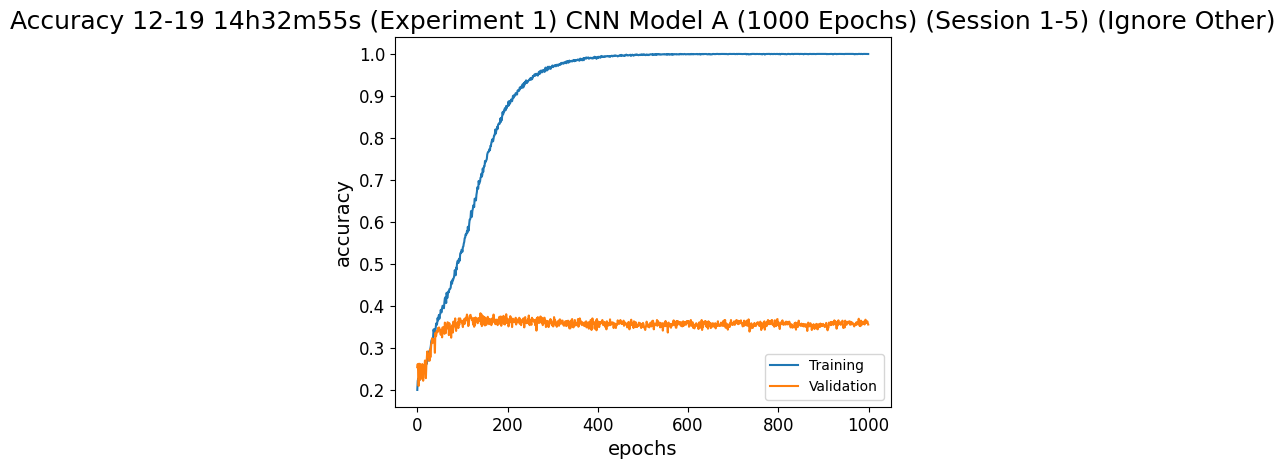

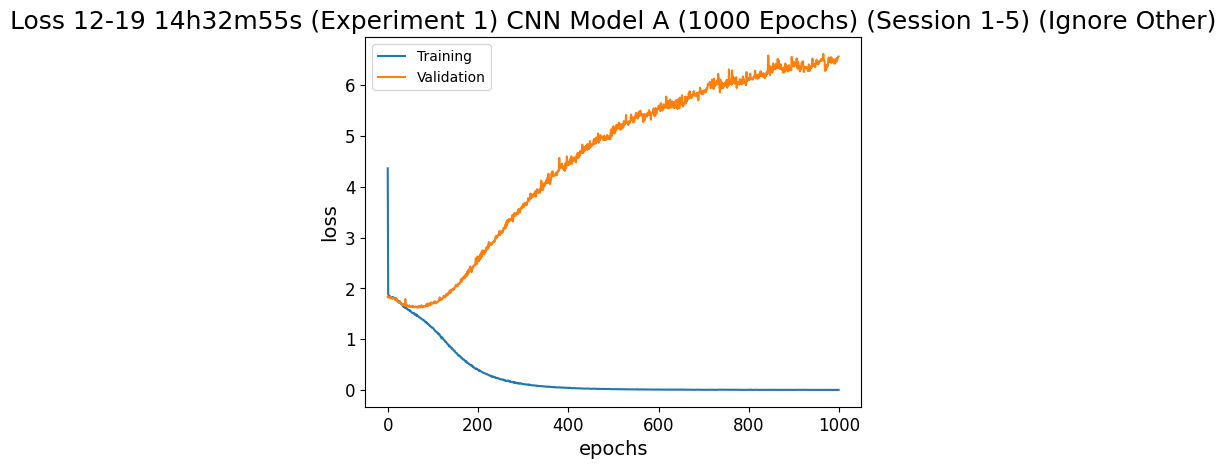

              precision    recall  f1-score   support

           0       0.30      0.32      0.31       164
           2       0.47      0.31      0.37       331
           3       0.33      0.11      0.17         9
           4       0.34      0.45      0.38       381
           5       0.24      0.09      0.13       151
           6       0.38      0.42      0.40       354
           7       0.44      0.54      0.49       229
           8       0.13      0.13      0.13        15

    accuracy                           0.37      1634
   macro avg       0.33      0.30      0.30      1634
weighted avg       0.37      0.37      0.36      1634



ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (9).

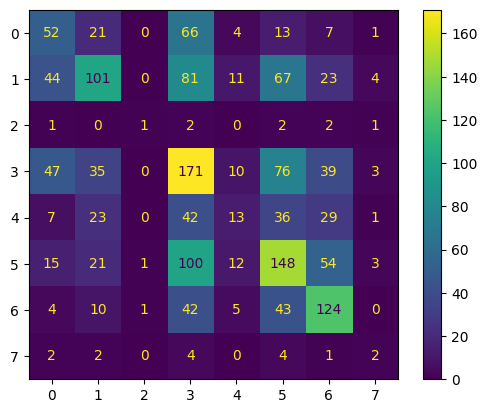

In [10]:
def experiment1(data, experimentName, trainName, validName):
  resultDir = os.path.join(resultFolder, experimentName)
  logDir = os.path.join(logFolder, experimentName)
  evaluation = Evaluation(data, resultDir, logDir)
  evaluation.evaluateAll(trainName, validName)

experimentName = '12-19 14h32m55s (Experiment 1) CNN Model A (1000 Epochs) (Session 1-5) (Ignore Other)'
trainName = 'events.out.tfevents.1671431579.gpu-comp-102.25677.0.v2'
validName = 'events.out.tfevents.1671431586.gpu-comp-102.25677.1.v2'
experiment1(iemocapAll, experimentName, trainName, validName)

## Experiment 2 (CNN Model A, 200 Epochs, Session 1-5, 5 Emotions with Merge)

Load model from /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_TrainedModel/12-19 17h14m48s (Experiment 2) CNN Model A (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge)

Start prediction...

Prediction Completed
    Number of results: 1603


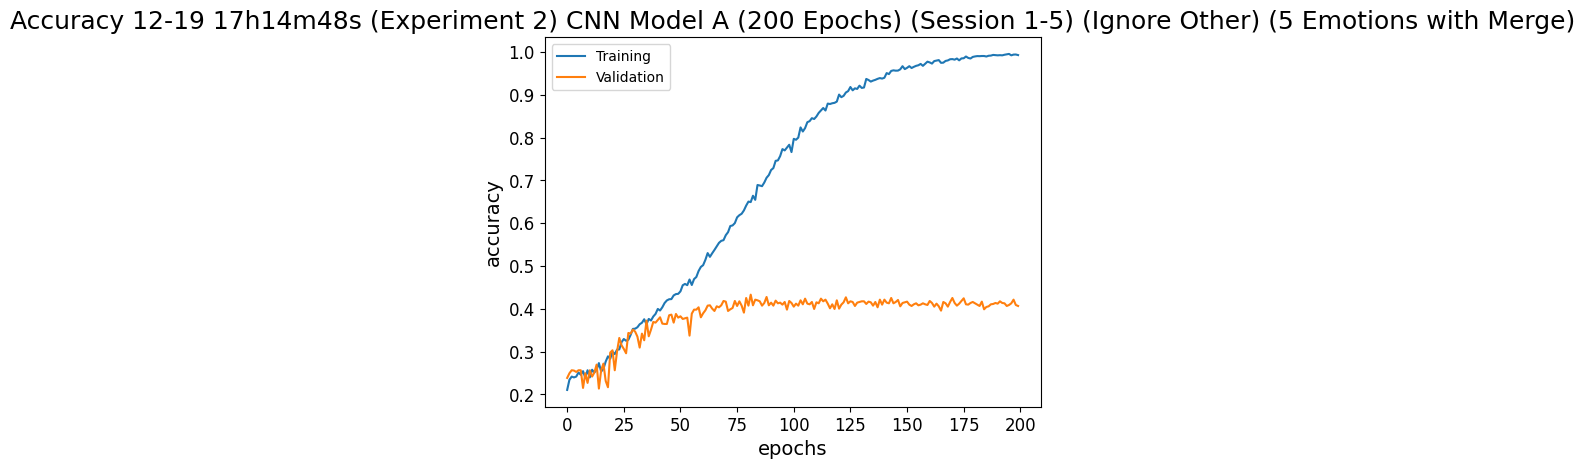

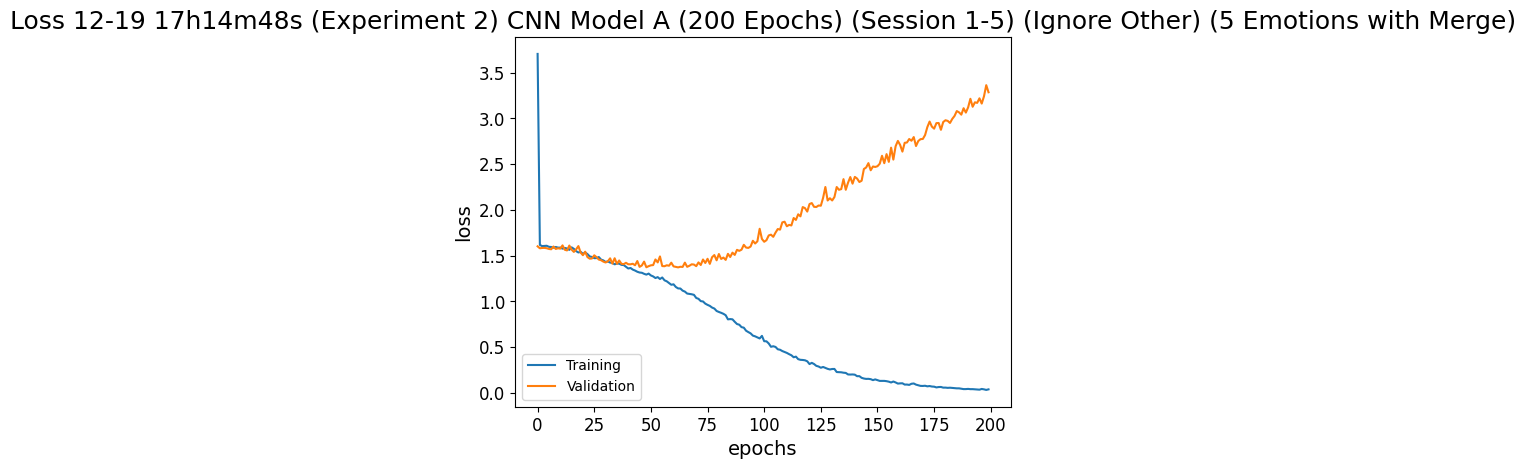

              precision    recall  f1-score   support

           0       0.41      0.29      0.34       164
           1       0.37      0.43      0.40       381
           2       0.54      0.32      0.40       480
           3       0.37      0.50      0.43       354
           4       0.47      0.61      0.53       224

    accuracy                           0.42      1603
   macro avg       0.43      0.43      0.42      1603
weighted avg       0.44      0.42      0.42      1603



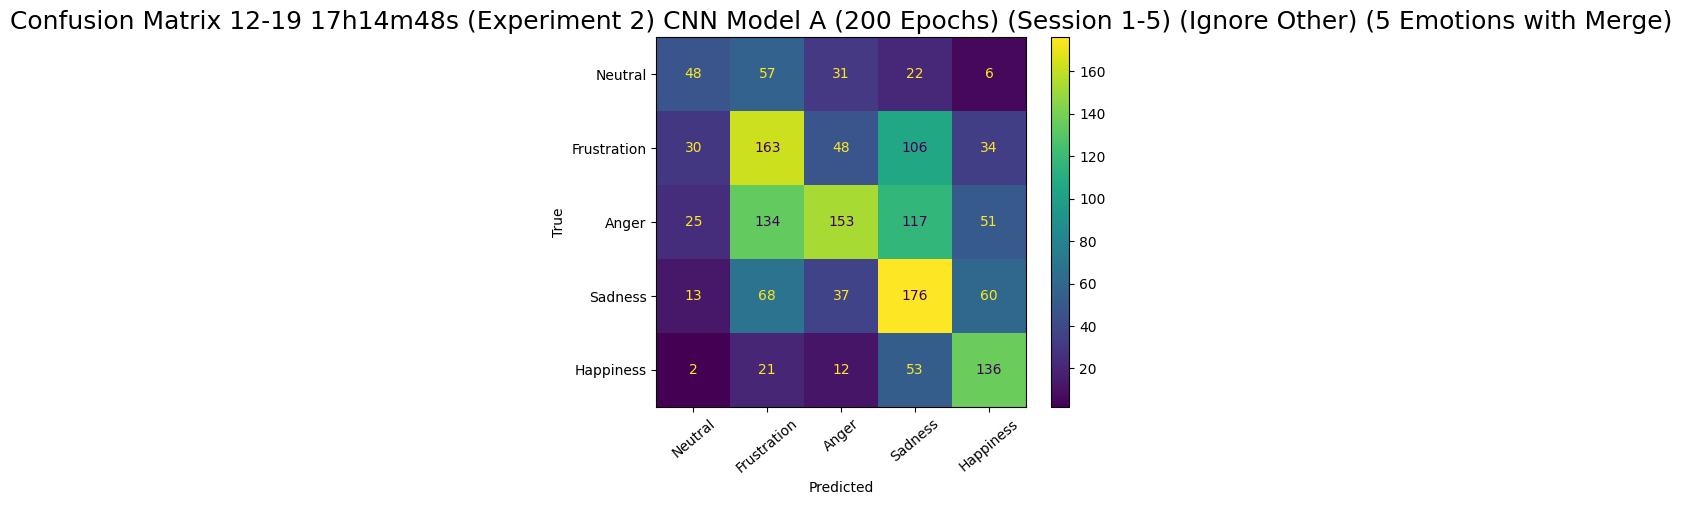

In [6]:
def experiment2(data, experimentName, trainName, validName):
  resultDir = os.path.join(resultFolder, experimentName)
  logDir = os.path.join(logFolder, experimentName)
  evaluation = Evaluation(data, resultDir, logDir)
  evaluation.evaluateAll(trainName, validName)

experimentName = '12-19 17h14m48s (Experiment 2) CNN Model A (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge)'
trainName = 'events.out.tfevents.1671441292.gpu-comp-102.4138.0.v2'
validName = 'events.out.tfevents.1671441299.gpu-comp-102.4138.1.v2'
experiment2(iemocap5Labels, experimentName, trainName, validName)

## Experiment 3 (CNN Model B, 200 Epochs, Session 1-5, 5 Emotions with Merge, 0.00001 lr 0.0001 decay)

Load model from /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_TrainedModel/12-20 00h20m56s (Experiment 3) CNN Model B (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge) (00001 lr 0001 decay)


2022-12-20 14:28:23.276091: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Start prediction...

Prediction Completed
    Number of results: 1603


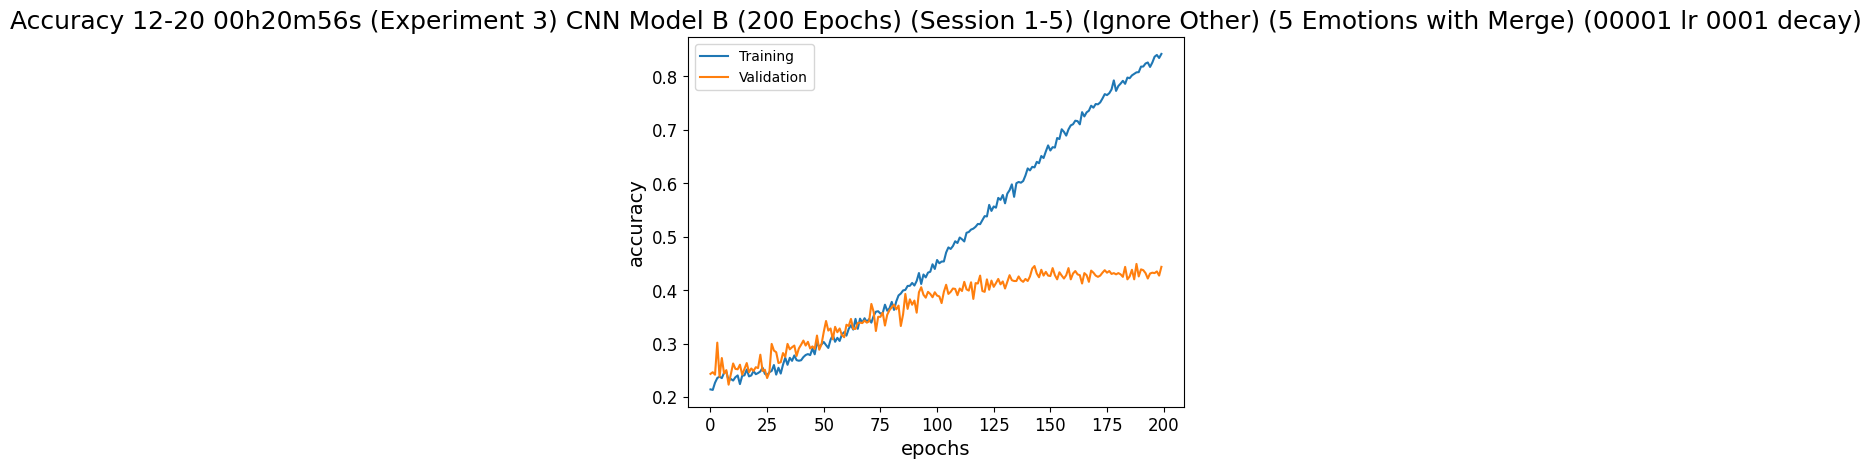

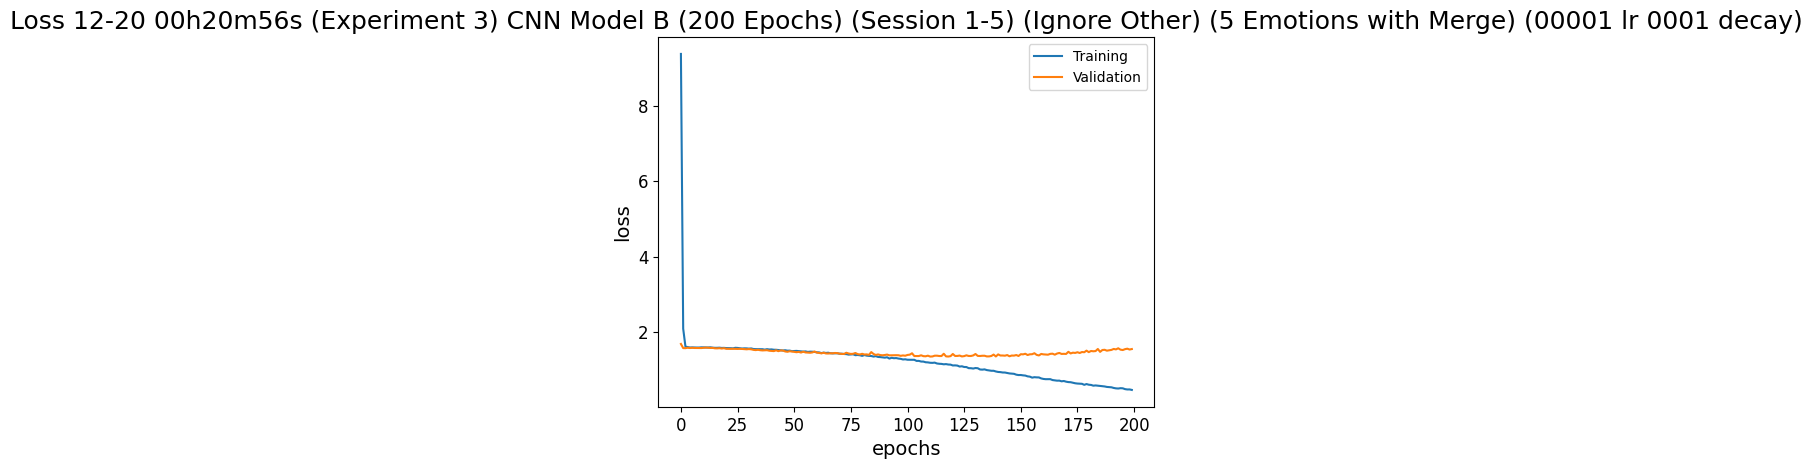

              precision    recall  f1-score   support

           0       0.43      0.30      0.35       164
           1       0.39      0.38      0.39       381
           2       0.51      0.41      0.46       480
           3       0.42      0.53      0.47       354
           4       0.48      0.63      0.54       224

    accuracy                           0.45      1603
   macro avg       0.45      0.45      0.44      1603
weighted avg       0.45      0.45      0.44      1603



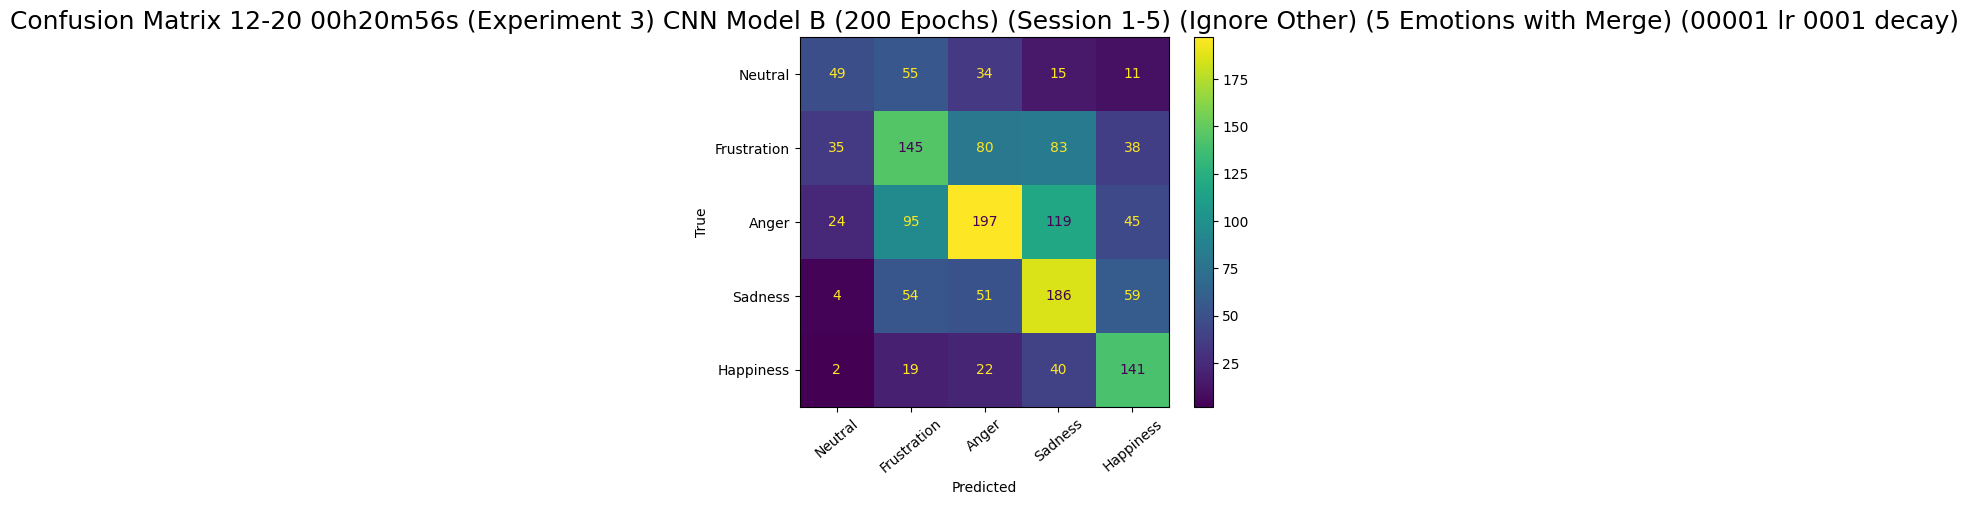

In [4]:
def experiment3(data, experimentName, trainName, validName):
  resultDir = os.path.join(resultFolder, experimentName)
  logDir = os.path.join(logFolder, experimentName)
  evaluation = Evaluation(data, resultDir, logDir)
  evaluation.evaluateAll(trainName, validName)

experimentName = '12-20 00h20m56s (Experiment 3) CNN Model B (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge) (00001 lr 0001 decay)'
trainName = 'events.out.tfevents.1671466862.gpu-comp-101.24774.0.v2'
validName = 'events.out.tfevents.1671466871.gpu-comp-101.24774.1.v2'
experiment3(iemocap5Labels, experimentName, trainName, validName)

## Experiment 4 (CNN Model C, 200 Epochs, Session 1-5, 5 Emotions with Merge)

Load model from /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_TrainedModel/12-19 18h38m20s (Experiment 4) CNN Model C (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge)

Start prediction...

Prediction Completed
    Number of results: 1603


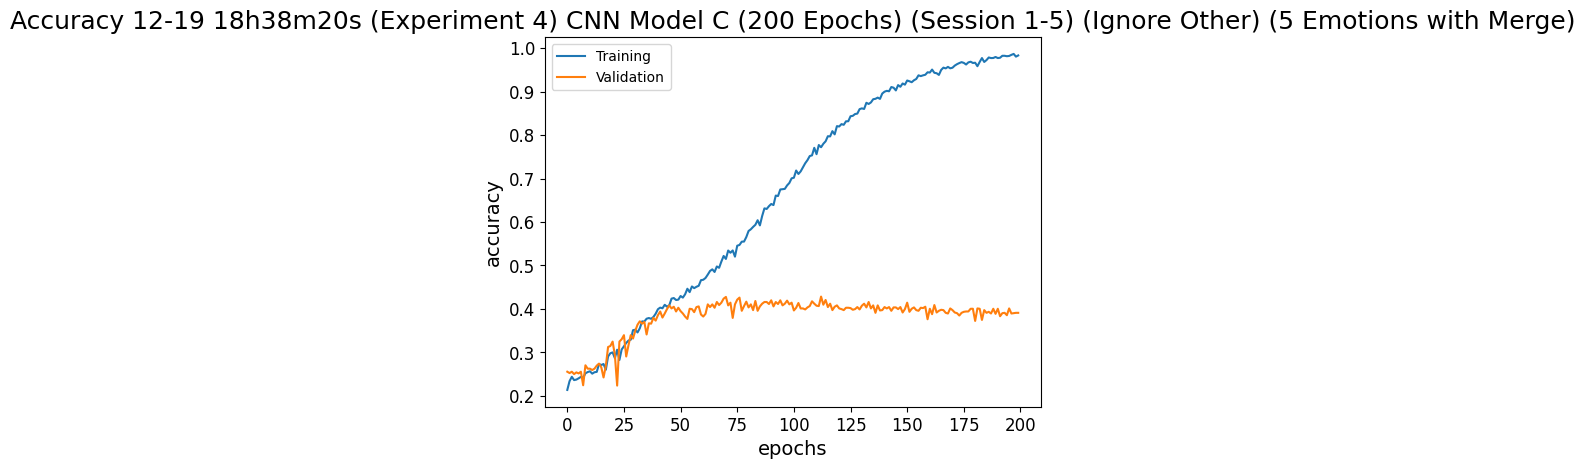

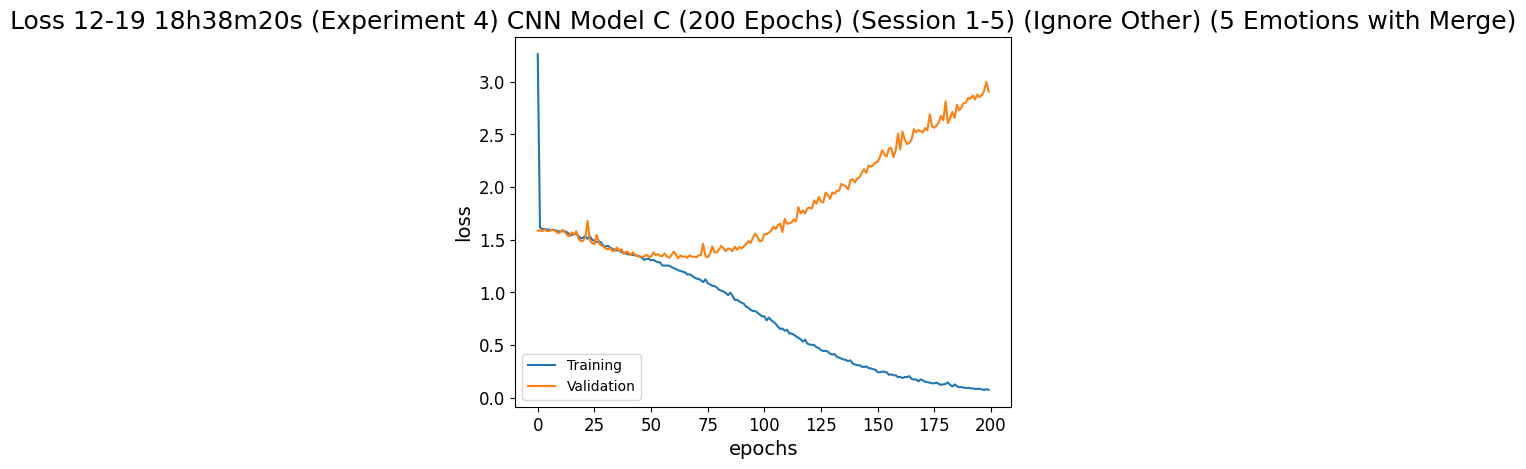

              precision    recall  f1-score   support

           0       0.39      0.40      0.40       164
           1       0.38      0.35      0.36       381
           2       0.52      0.38      0.44       480
           3       0.39      0.53      0.45       354
           4       0.50      0.57      0.53       224

    accuracy                           0.43      1603
   macro avg       0.44      0.45      0.44      1603
weighted avg       0.44      0.43      0.43      1603



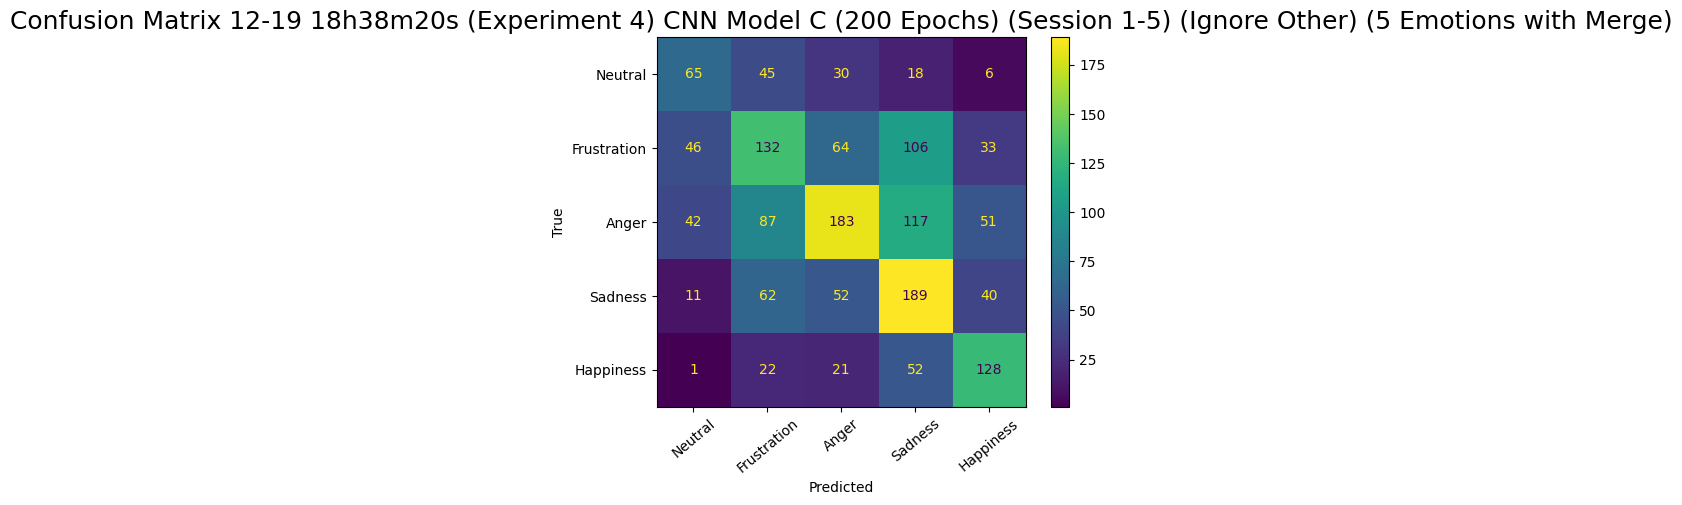

In [8]:
def experiment4(data, experimentName, trainName, validName):
  resultDir = os.path.join(resultFolder, experimentName)
  logDir = os.path.join(logFolder, experimentName)
  evaluation = Evaluation(data, resultDir, logDir)
  evaluation.evaluateAll(trainName, validName)

experimentName = '12-19 18h38m20s (Experiment 4) CNN Model C (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge)'
trainName = 'events.out.tfevents.1671446303.gpu-comp-102.4138.4.v2'
validName = 'events.out.tfevents.1671446320.gpu-comp-102.4138.5.v2'
experiment4(iemocap5Labels, experimentName, trainName, validName)

## Experiment 5 (CNN Model D, 200 Epochs, Session 1-5, 5 Emotions with Merge)

Load model from /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_TrainedModel/12-19 19h41m12s (Experiment 5) CNN Model D (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge)

Start prediction...

Prediction Completed
    Number of results: 1603


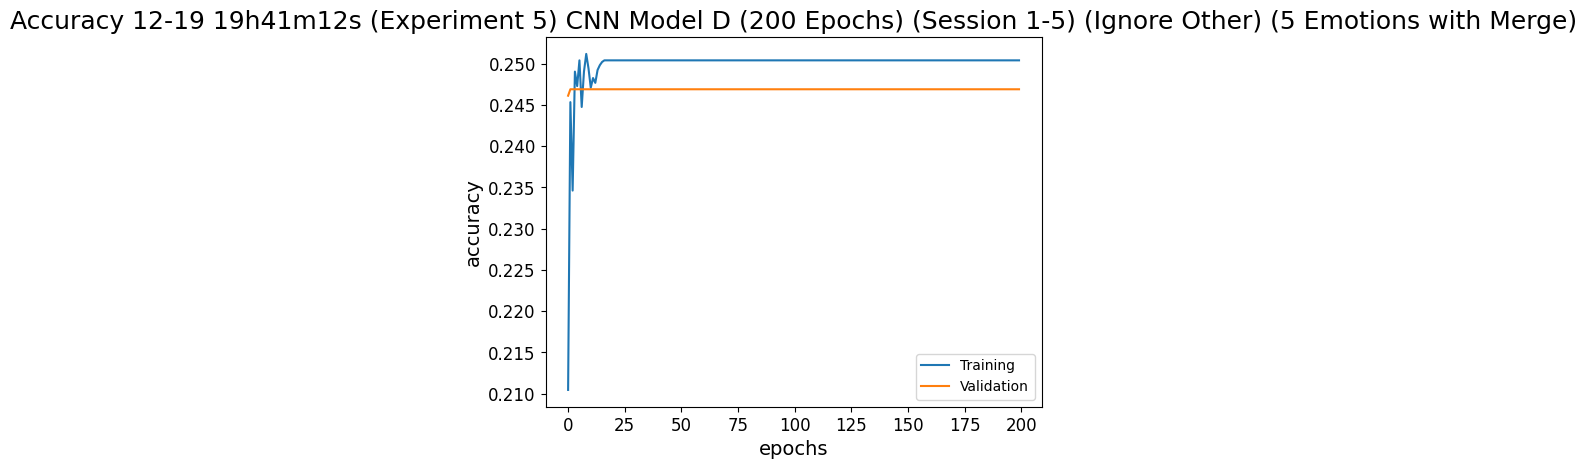

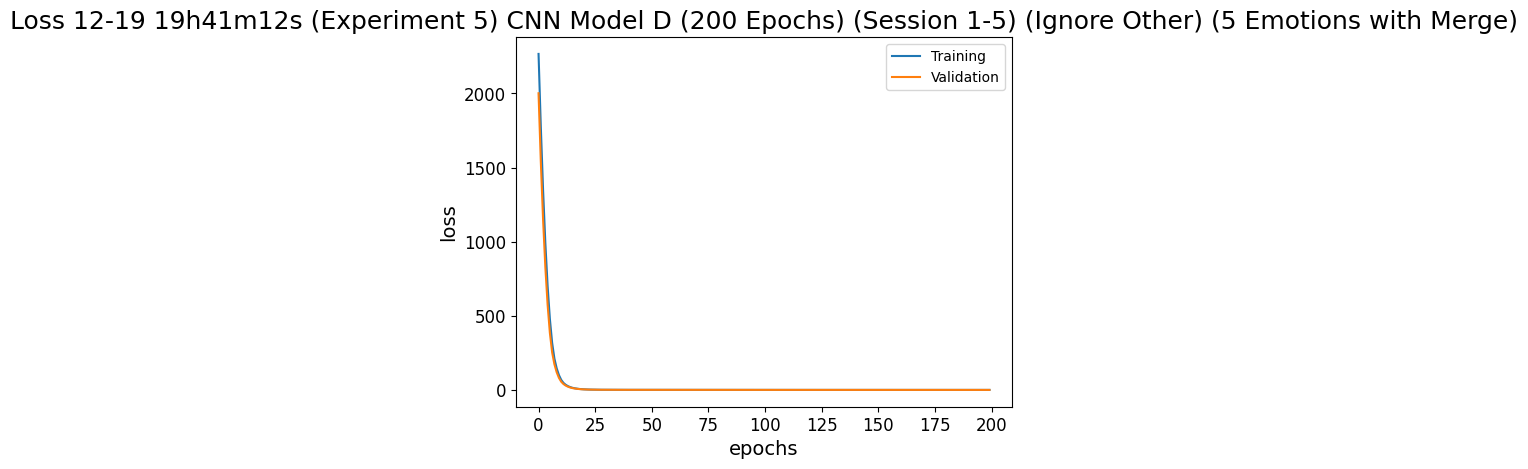

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.24      1.00      0.38       381
           2       0.00      0.00      0.00       480
           3       0.00      0.00      0.00       354
           4       0.00      0.00      0.00       224

    accuracy                           0.24      1603
   macro avg       0.05      0.20      0.08      1603
weighted avg       0.06      0.24      0.09      1603



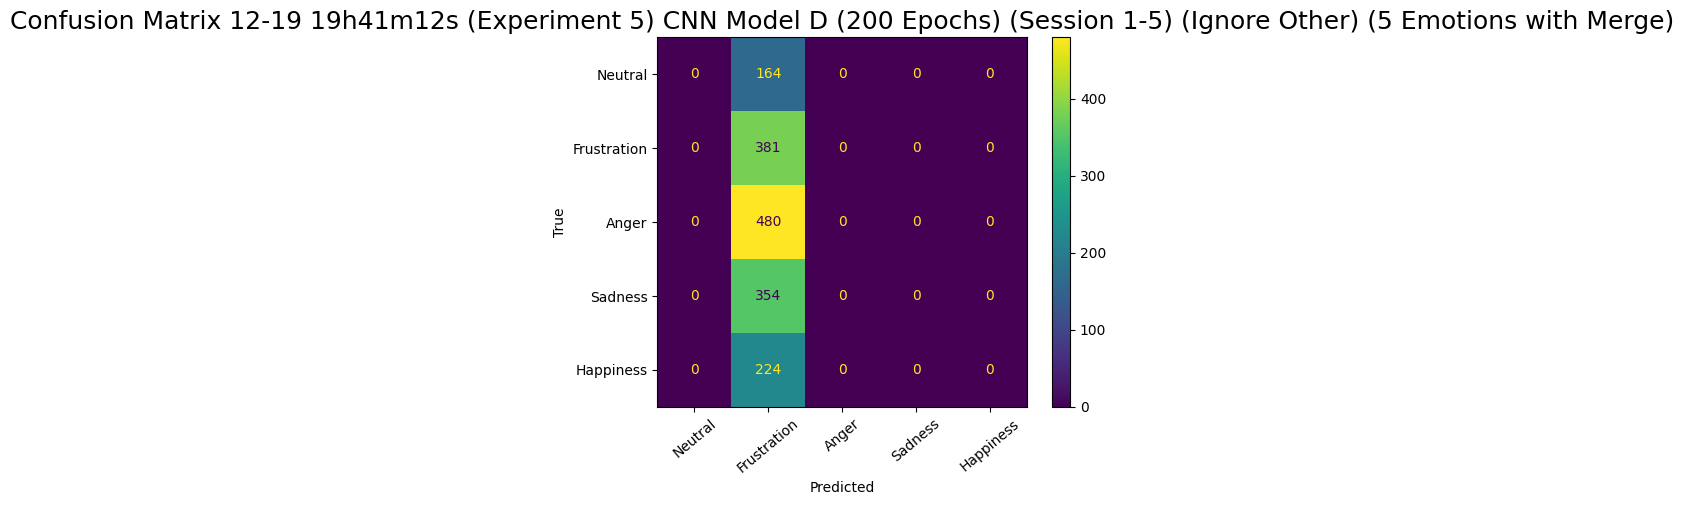

In [9]:
def experiment5(data, experimentName, trainName, validName):
  resultDir = os.path.join(resultFolder, experimentName)
  logDir = os.path.join(logFolder, experimentName)
  evaluation = Evaluation(data, resultDir, logDir)
  evaluation.evaluateAll(trainName, validName)

experimentName = '12-19 19h41m12s (Experiment 5) CNN Model D (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge)'
trainName = 'events.out.tfevents.1671450075.gpu-comp-102.4138.6.v2'
validName = 'events.out.tfevents.1671450094.gpu-comp-102.4138.7.v2'
experiment5(iemocap5Labels, experimentName, trainName, validName)

## Experiment 6 (CNN Model E, 200 Epochs, Session 1-5, 5 Emotions with Merge, 0.000001 lr 0.00001 decay)

Load model from /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_TrainedModel/12-20 02h29m52s (Experiment 6) CNN Model E (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge) (000001 lr 00001 decay)

Start prediction...

Prediction Completed
    Number of results: 1603


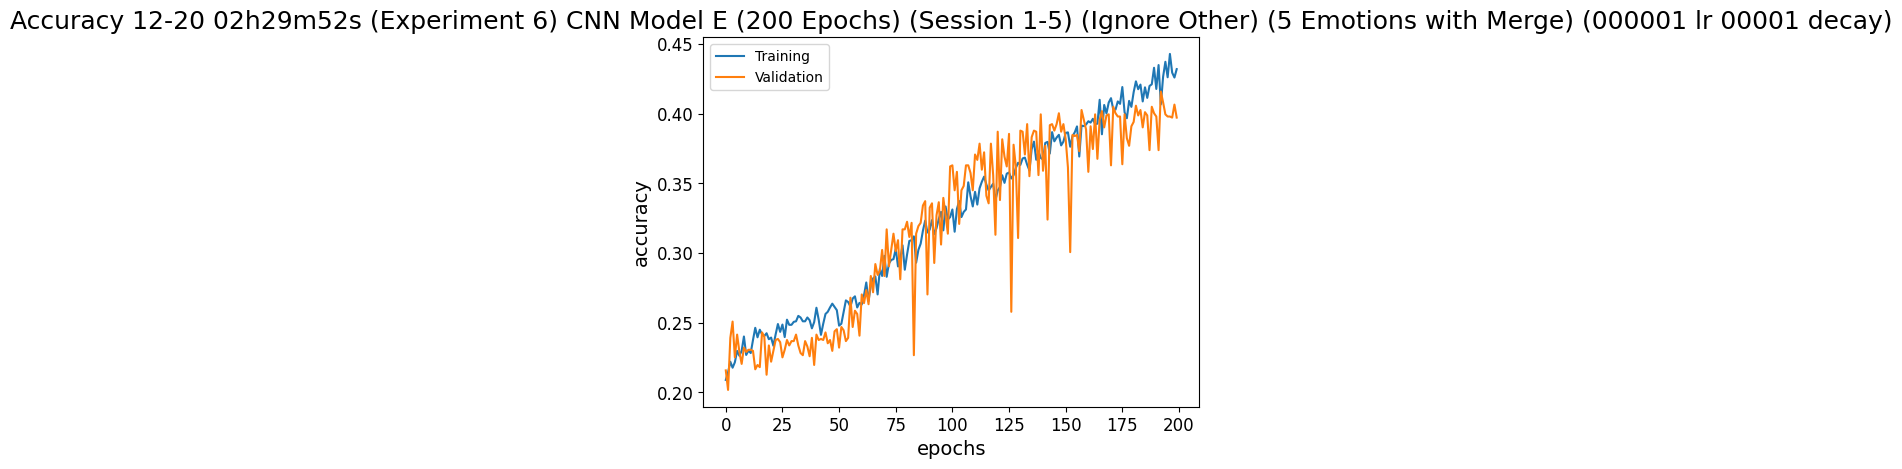

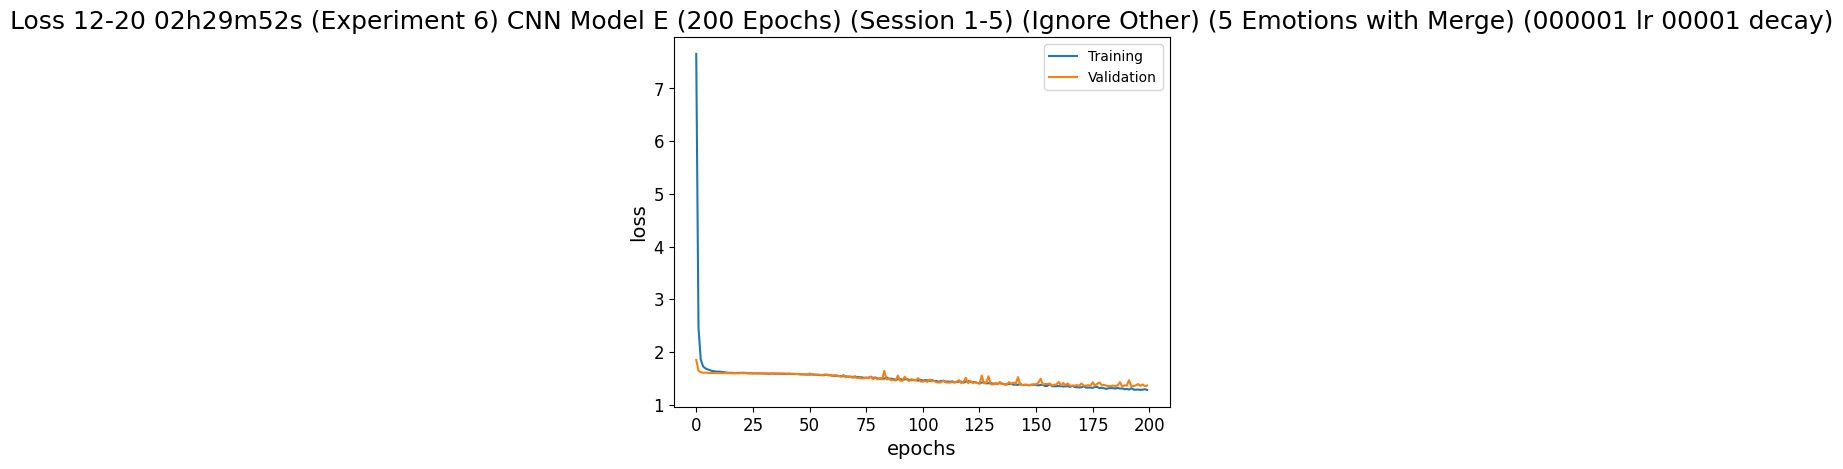

              precision    recall  f1-score   support

           0       0.23      0.56      0.32       164
           1       0.35      0.35      0.35       381
           2       0.46      0.23      0.31       480
           3       0.36      0.33      0.34       354
           4       0.56      0.62      0.59       224

    accuracy                           0.37      1603
   macro avg       0.39      0.42      0.38      1603
weighted avg       0.40      0.37      0.37      1603



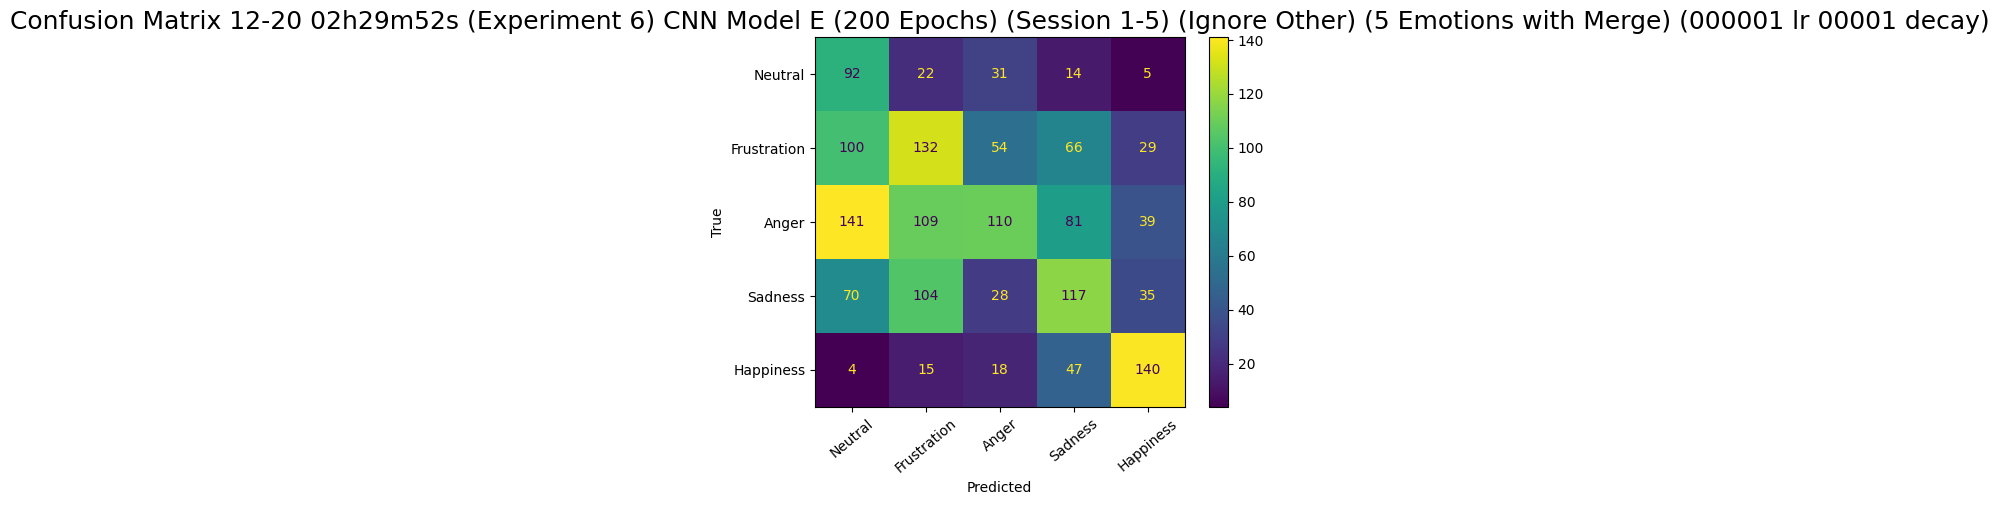

In [5]:
def experiment6(data, experimentName, trainName, validName):
  resultDir = os.path.join(resultFolder, experimentName)
  logDir = os.path.join(logFolder, experimentName)
  evaluation = Evaluation(data, resultDir, logDir)
  evaluation.evaluateAll(trainName, validName)

experimentName = '12-20 02h29m52s (Experiment 6) CNN Model E (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge) (000001 lr 00001 decay)'
trainName = 'events.out.tfevents.1671474595.gpu-comp-101.1563.2.v2'
validName = 'events.out.tfevents.1671474598.gpu-comp-101.1563.3.v2'
experiment6(iemocap5Labels, experimentName, trainName, validName)

## Experiment 7 (CNN Model A, 200 Epochs, Session 1-5, 5 Emotions with Merge and Ignore 6 lower)

Data Extration Completed
    Number of data: 7501
      Neutral     : 1718
      Frustration : 1866
      Anger       : 1118
      Sadness     : 1135
      Happiness   : 1664
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0

Processing data to Mel Spectrogram...
Mel Spectrogram Processing Completed
    Shape of images: (7501, 256, 256, 1)

Processing labels...
Label Processing Completed

Splitting data...
Data Split Completed

Data Processing Completed!
  Data shapes:
    x_train  : (6001, 256, 256, 1)
    y_train  : (6001,)
    sr_train : (6001,)
    x_test   : (1500, 256, 256, 1)
    y_test   : (1500,)
    sr_test  : (1500,)

Load model from /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_TrainedModel/12-20 14h53m05s (Experiment 7) CNN Model A (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge and Ignore 6 lower)


2022-12-20 15:41:24.383328: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Start prediction...

Prediction Completed
    Number of results: 1500


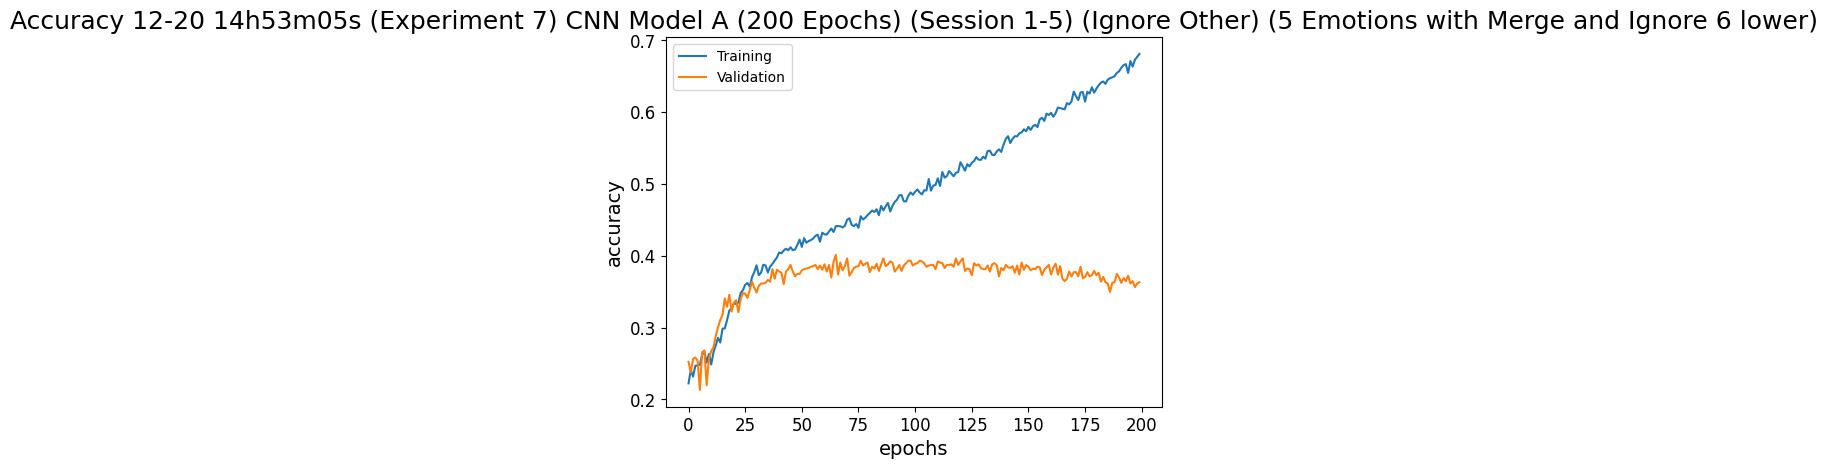

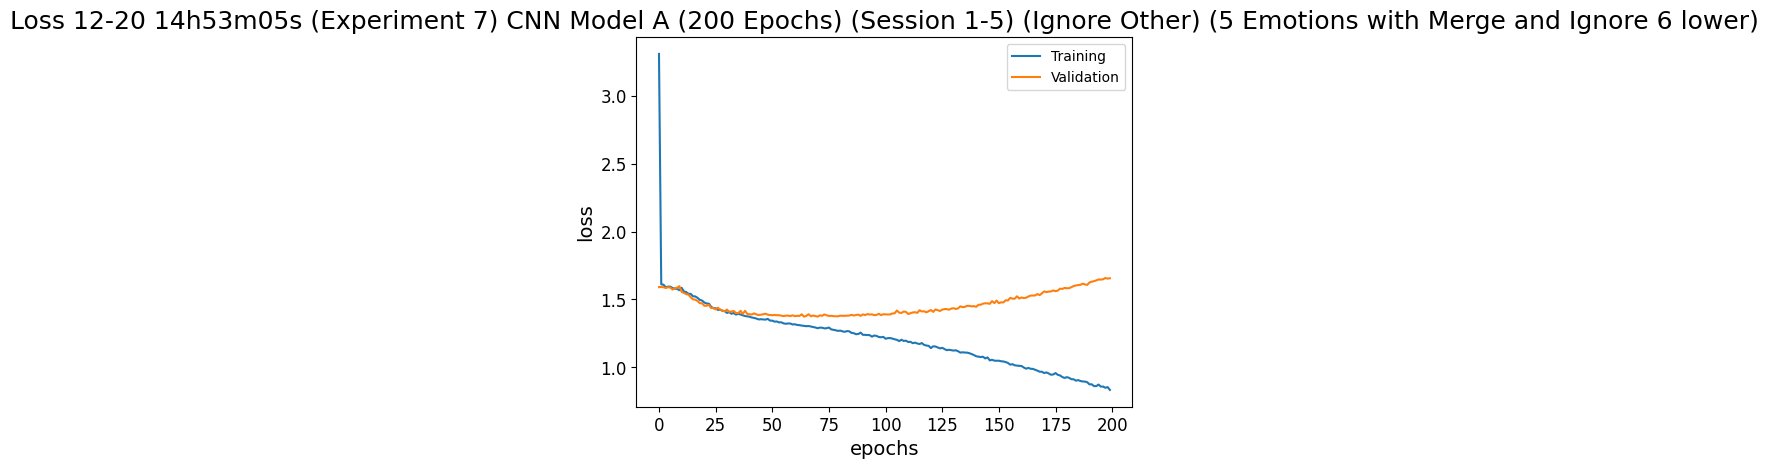

              precision    recall  f1-score   support

           0       0.33      0.36      0.34       157
           1       0.31      0.30      0.30       345
           2       0.45      0.25      0.32       449
           3       0.33      0.44      0.37       337
           4       0.46      0.60      0.52       212

    accuracy                           0.37      1500
   macro avg       0.37      0.39      0.37      1500
weighted avg       0.38      0.37      0.36      1500



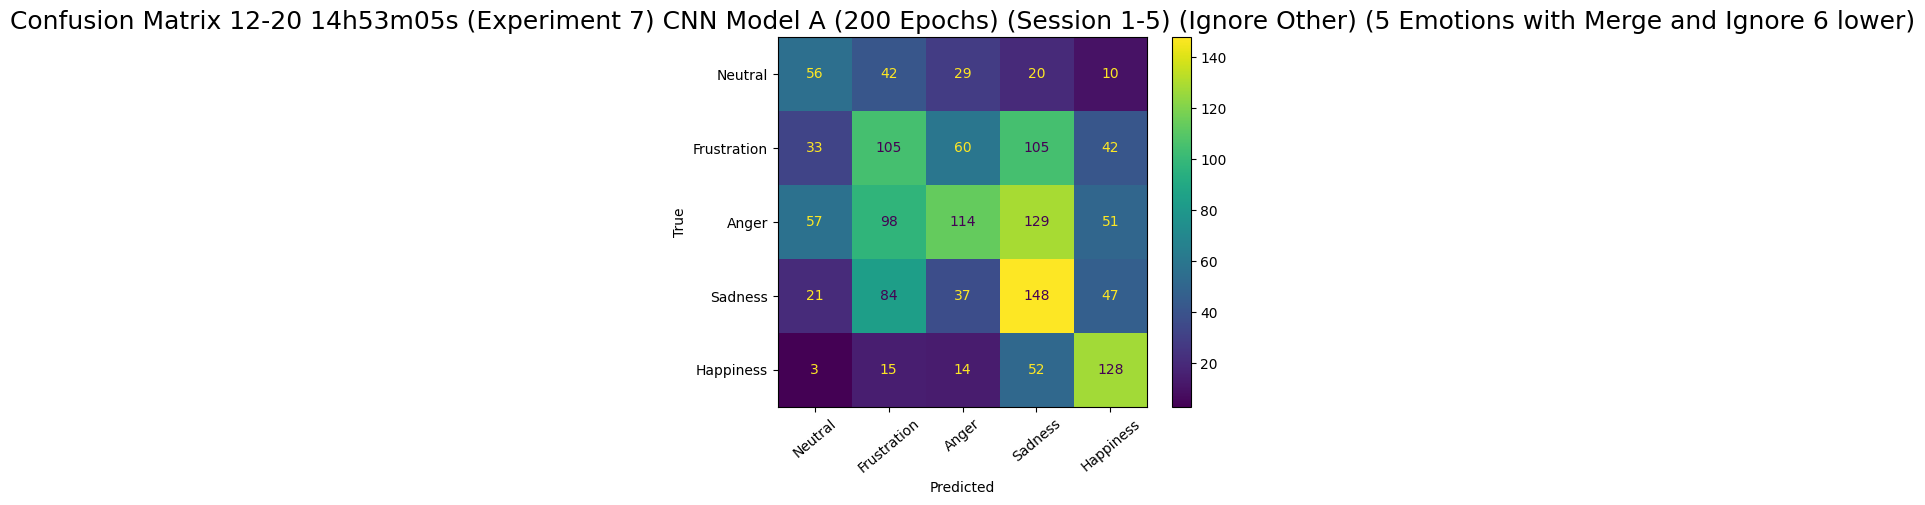

In [3]:
labelsToInclude = ['Neutral', 'Frustration', 'Anger', 'Sadness', 'Happiness']
mergeHappinessExcitement = True
ignoreDuration = 6

iemocap5LabelsIgnore6 = DataModel(labelsToInclude=labelsToInclude,
                                  mergeHappinessExcitement=mergeHappinessExcitement,
                                  ignoreDuration=ignoreDuration)
iemocap5LabelsIgnore6.extractIEMOCAPData()
iemocap5LabelsIgnore6.processData()

def experiment7(data, experimentName, trainName, validName):
  resultDir = os.path.join(resultFolder, experimentName)
  logDir = os.path.join(logFolder, experimentName)
  evaluation = Evaluation(data, resultDir, logDir)
  evaluation.evaluateAll(trainName, validName)

experimentName = '12-20 14h53m05s (Experiment 7) CNN Model A (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge and Ignore 6 lower)'
trainName = 'events.out.tfevents.1671519188.gpu-comp-104.27293.2.v2'
validName = 'events.out.tfevents.1671519192.gpu-comp-104.27293.3.v2'
experiment7(iemocap5LabelsIgnore6, experimentName, trainName, validName)

## Experiment 8 (CNN Model A, 200 Epochs, Session 1-5, 5 Emotions with Merge and Split at 4)

Data Extration Completed
    Number of data: 10434
      Neutral     : 2207
      Frustration : 2651
      Anger       : 1483
      Sadness     : 1764
      Happiness   : 2329
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0

Processing data to Mel Spectrogram...
Mel Spectrogram Processing Completed
    Shape of images: (10434, 256, 256, 1)

Processing labels...
Label Processing Completed

Splitting data...
Data Split Completed

Data Processing Completed!
  Data shapes:
    x_train  : (8348, 256, 256, 1)
    y_train  : (8348,)
    sr_train : (8348,)
    x_test   : (2086, 256, 256, 1)
    y_test   : (2086,)
    sr_test  : (2086,)

Load model from /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_TrainedModel/12-20 15h26m17s (Experiment 8) CNN Model A (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge and Split 4)

Start prediction...

Prediction Completed
    Number of results: 2086


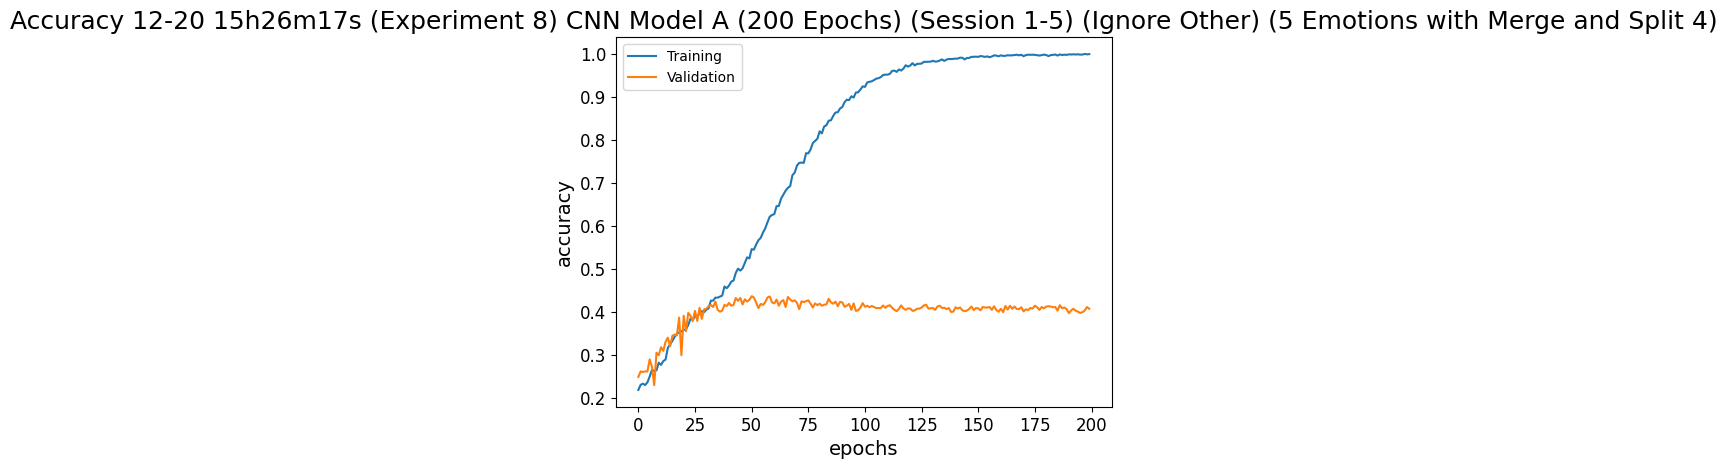

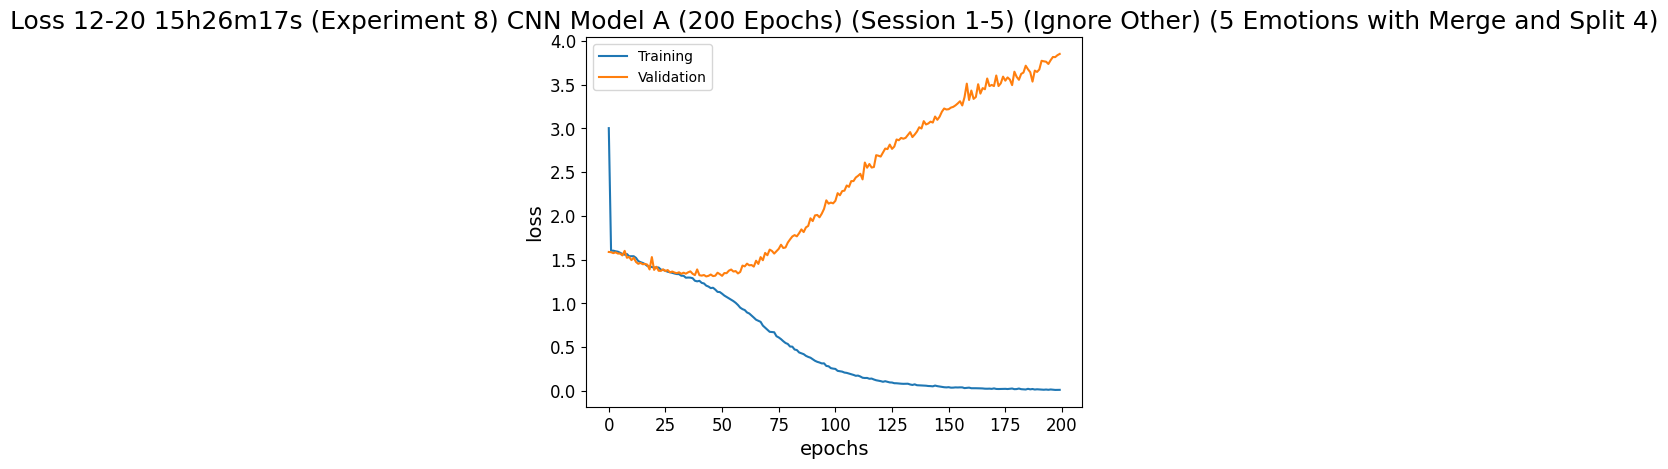

              precision    recall  f1-score   support

           0       0.39      0.33      0.36       206
           1       0.39      0.38      0.38       512
           2       0.47      0.40      0.43       622
           3       0.41      0.45      0.43       427
           4       0.46      0.61      0.53       319

    accuracy                           0.43      2086
   macro avg       0.42      0.43      0.43      2086
weighted avg       0.43      0.43      0.43      2086



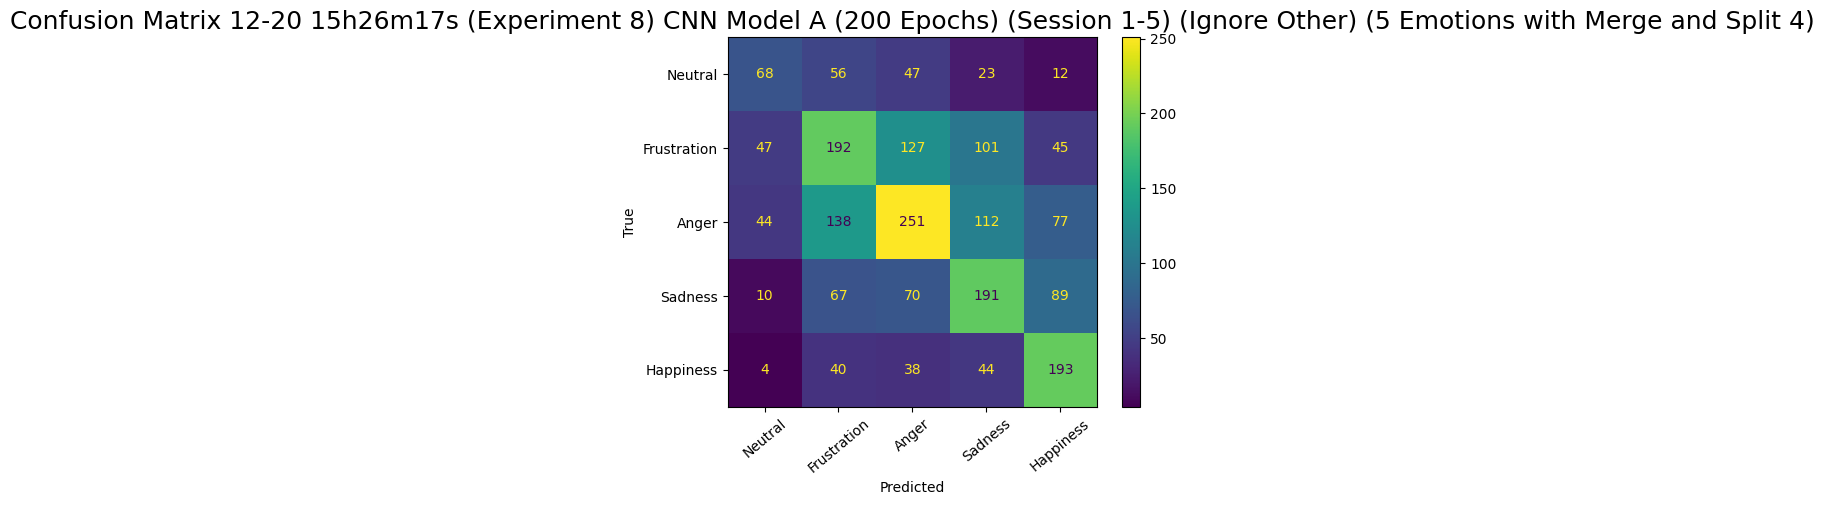

In [5]:
labelsToInclude = ['Neutral', 'Frustration', 'Anger', 'Sadness', 'Happiness']
mergeHappinessExcitement = True
splitDuration = 4
ignoreDuration = 1

iemocap5LabelsSplit4 = DataModel(labelsToInclude=labelsToInclude,
                                  mergeHappinessExcitement=mergeHappinessExcitement,
                                  splitDuration=splitDuration,
                                  ignoreDuration=ignoreDuration)
iemocap5LabelsSplit4.extractIEMOCAPData()
iemocap5LabelsSplit4.processData()

def experiment8(data, experimentName, trainName, validName):
  resultDir = os.path.join(resultFolder, experimentName)
  logDir = os.path.join(logFolder, experimentName)
  evaluation = Evaluation(data, resultDir, logDir)
  evaluation.evaluateAll(trainName, validName)

experimentName = '12-20 15h26m17s (Experiment 8) CNN Model A (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge and Split 4)'
trainName = 'events.out.tfevents.1671521181.gpu-comp-104.29508.2.v2'
validName = 'events.out.tfevents.1671521187.gpu-comp-104.29508.3.v2'
experiment8(iemocap5LabelsSplit4, experimentName, trainName, validName)

## Experiment 9 (CNN Model A, 200 Epochs, Session 1-5, 5 Emotions with Merge and Ignore 2 lower with Split at 5)

Data Extration Completed
    Number of data: 9603
      Neutral     : 2051
      Frustration : 2404
      Anger       : 1377
      Sadness     : 1621
      Happiness   : 2150
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0

Processing data to Mel Spectrogram...
Mel Spectrogram Processing Completed
    Shape of images: (9603, 256, 256, 1)

Processing labels...
Label Processing Completed

Splitting data...
Data Split Completed

Data Processing Completed!
  Data shapes:
    x_train  : (7683, 256, 256, 1)
    y_train  : (7683,)
    sr_train : (7683,)
    x_test   : (1920, 256, 256, 1)
    y_test   : (1920,)
    sr_test  : (1920,)

Load model from /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_TrainedModel/12-20 15h49m56s (Experiment 9) CNN Model A (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge and Split 4 Ignore 2)

Start prediction...

Prediction Completed
    Number of results: 1920


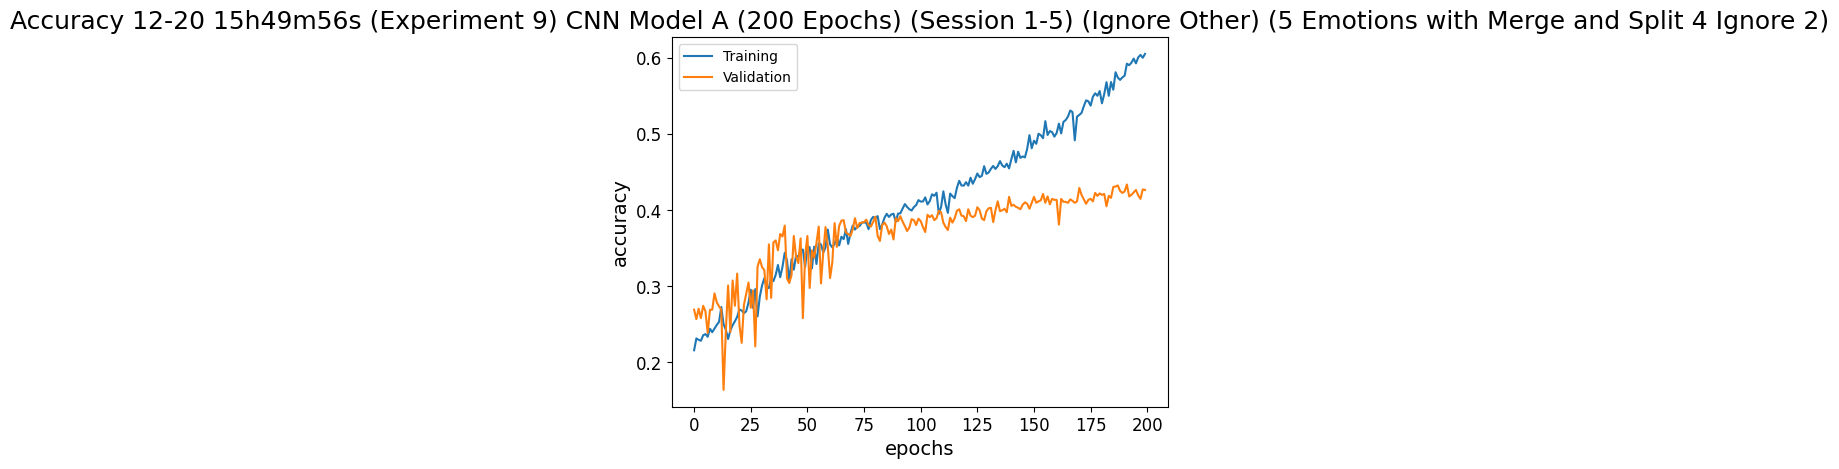

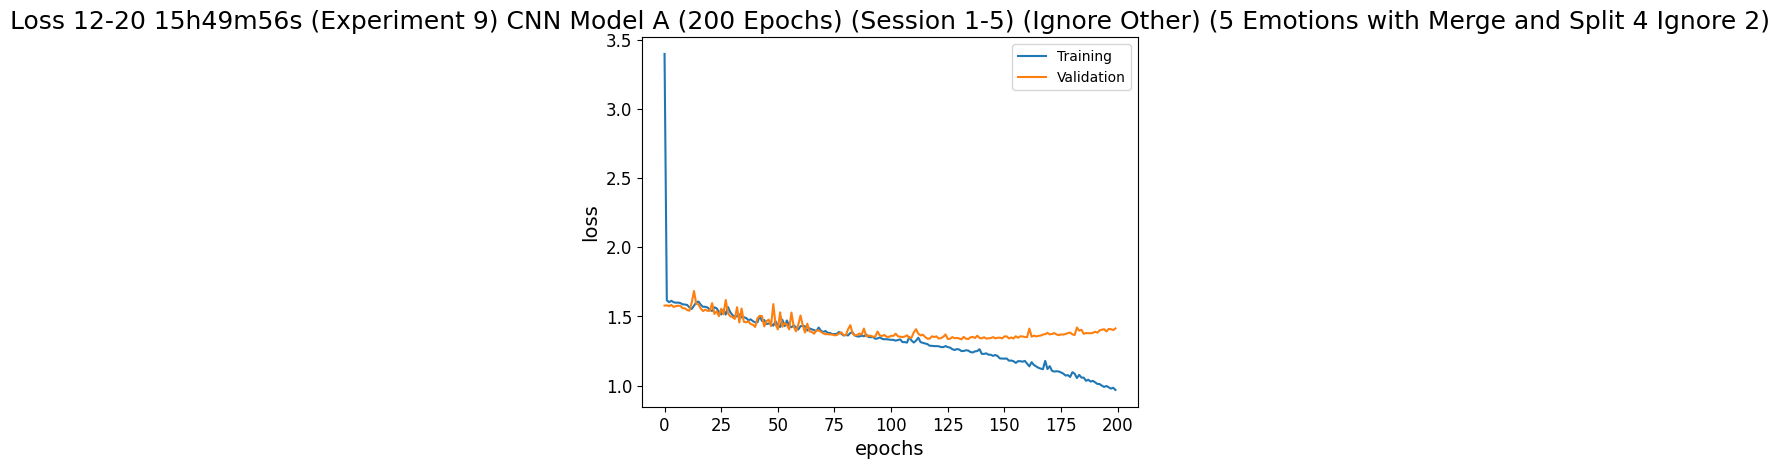

              precision    recall  f1-score   support

           0       0.37      0.31      0.34       191
           1       0.37      0.28      0.32       464
           2       0.44      0.40      0.42       580
           3       0.39      0.52      0.44       397
           4       0.52      0.65      0.58       288

    accuracy                           0.42      1920
   macro avg       0.42      0.43      0.42      1920
weighted avg       0.42      0.42      0.41      1920



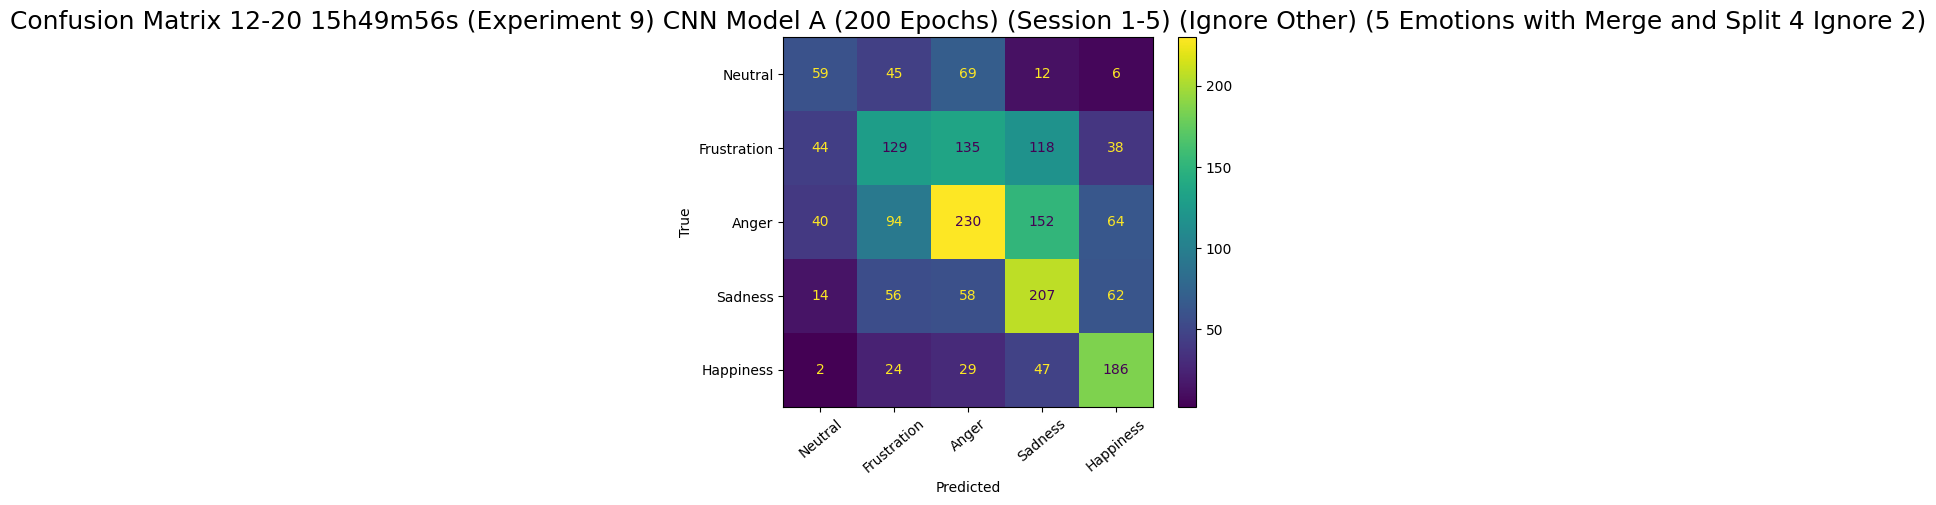

In [6]:
labelsToInclude = ['Neutral', 'Frustration', 'Anger', 'Sadness', 'Happiness']
mergeHappinessExcitement = True
splitDuration = 4
ignoreDuration = 2

iemocap5LabelsSplit4Ignore2 = DataModel(labelsToInclude=labelsToInclude,
                                        mergeHappinessExcitement=mergeHappinessExcitement,
                                        splitDuration=splitDuration,
                                        ignoreDuration=ignoreDuration)
iemocap5LabelsSplit4Ignore2.extractIEMOCAPData()
iemocap5LabelsSplit4Ignore2.processData()

def experiment9(data, experimentName, trainName, validName):
  resultDir = os.path.join(resultFolder, experimentName)
  logDir = os.path.join(logFolder, experimentName)
  evaluation = Evaluation(data, resultDir, logDir)
  evaluation.evaluateAll(trainName, validName)

experimentName = '12-20 15h49m56s (Experiment 9) CNN Model A (200 Epochs) (Session 1-5) (Ignore Other) (5 Emotions with Merge and Split 4 Ignore 2)'
trainName = 'events.out.tfevents.1671522600.gpu-comp-104.29508.6.v2'
validName = 'events.out.tfevents.1671522605.gpu-comp-104.29508.7.v2'
experiment9(iemocap5LabelsSplit4Ignore2, experimentName, trainName, validName)

## Experiment 10 (CNN Model A, 200 Epochs, IEMOCAP & EmoDB, 5 Emotions with Merge and Split 4 Ignore 2)

In [ ]:
labelsToInclude = ['Neutral', 'Frustration', 'Anger', 'Sadness', 'Happiness']
mergeHappinessExcitement = True
splitDuration = 4
ignoreDuration = 2

mixDataModel5LabelsSplit4Ignore2 = DataModel(labelsToInclude=labelsToInclude,
                                              mergeHappinessExcitement=mergeHappinessExcitement,
                                              splitDuration=splitDuration,
                                              ignoreDuration=ignoreDuration)
mixDataModel5LabelsSplit4Ignore2.extractIEMOCAPData()
mixDataModel5LabelsSplit4Ignore2.extractEmoDBData()
mixDataModel5LabelsSplit4Ignore2.processData()

Data Extration Completed
    Number of data: 10016
      Neutral     : 2130
      Frustration : 2473
      Anger       : 1504
      Sadness     : 1688
      Happiness   : 2221
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0
      Boredom     : 0

Processing data to Mel Spectrogram...
Mel Spectrogram Processing Completed
    Shape of images: (10016, 256, 256, 1)

Processing labels...
Label Processing Completed

Splitting data...
Data Split Completed

Data Processing Completed!
  Data shapes:
    x_train  : (8013, 256, 256, 1)
    y_train  : (8013,)
    sr_train : (8013,)
    x_test   : (2003, 256, 256, 1)
    y_test   : (2003,)
    sr_test  : (2003,)

Load model from /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_TrainedModel/12-21 16h58m37s (Experiment 10) CNN Model A (200 Epochs) (IEMOCAP EmoDB) (5 Emotions with Merge and Split 4 Ignore 2)


2022-12-22 11:59:47.465734: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Start prediction...

Prediction Completed
    Number of results: 2003


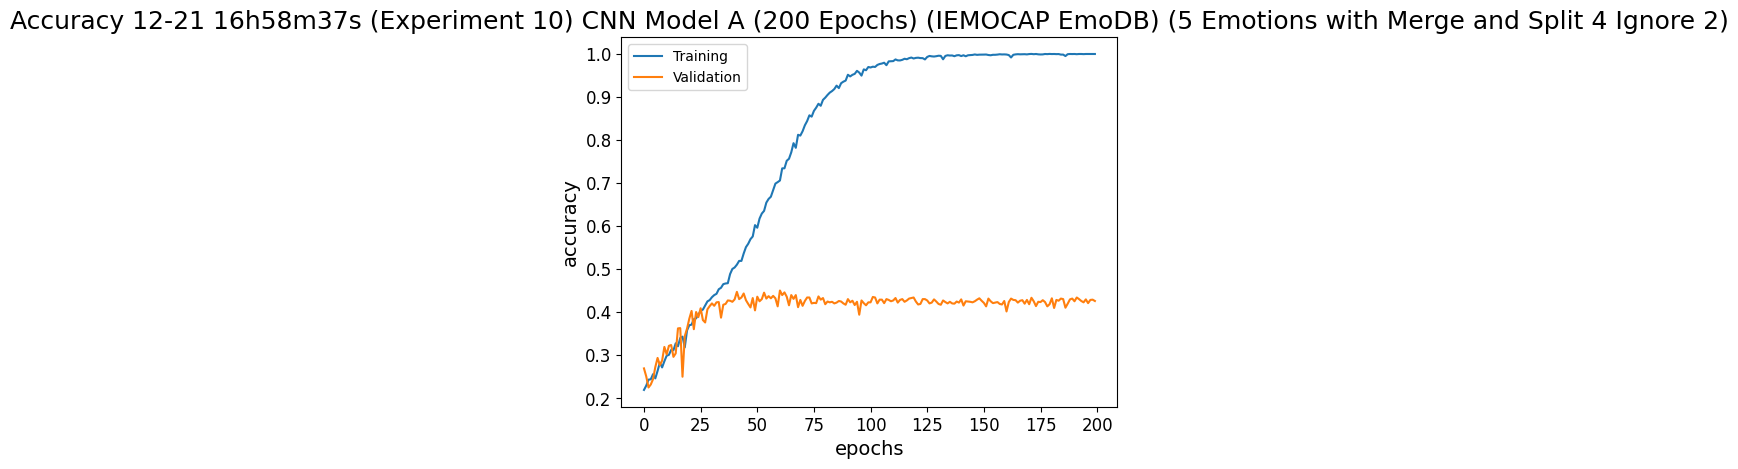

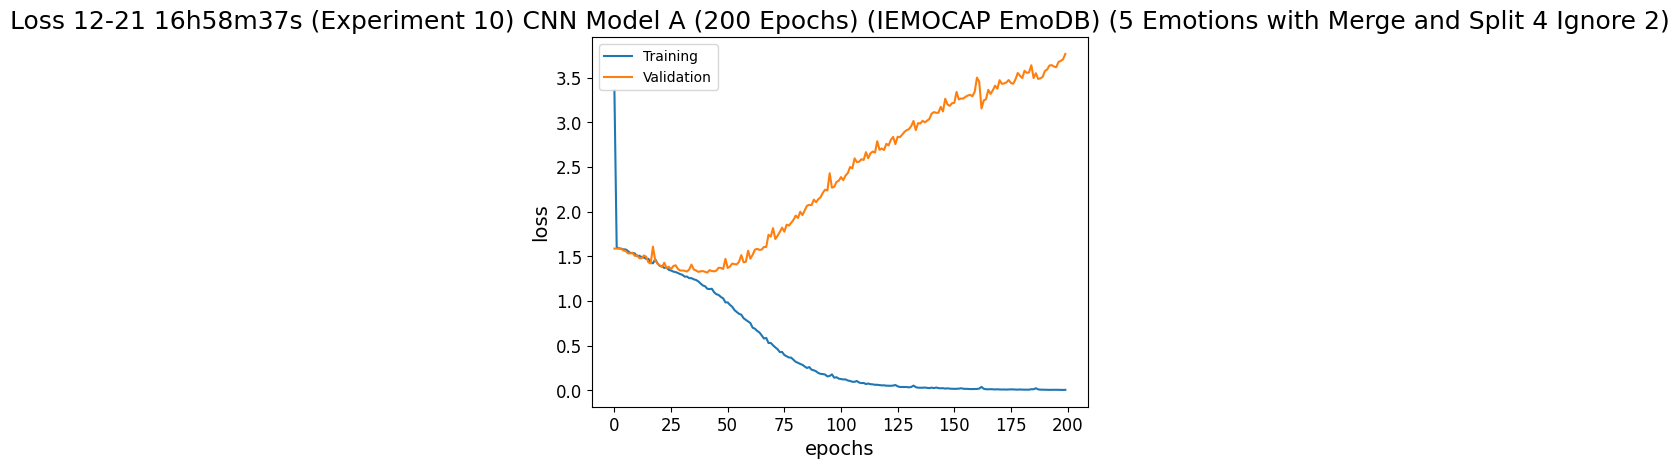

              precision    recall  f1-score   support

           0       0.60      0.47      0.53       308
           1       0.45      0.51      0.48       457
           2       0.46      0.59      0.52       482
           3       0.59      0.51      0.55       416
           4       0.66      0.50      0.57       340

    accuracy                           0.52      2003
   macro avg       0.55      0.52      0.53      2003
weighted avg       0.54      0.52      0.53      2003



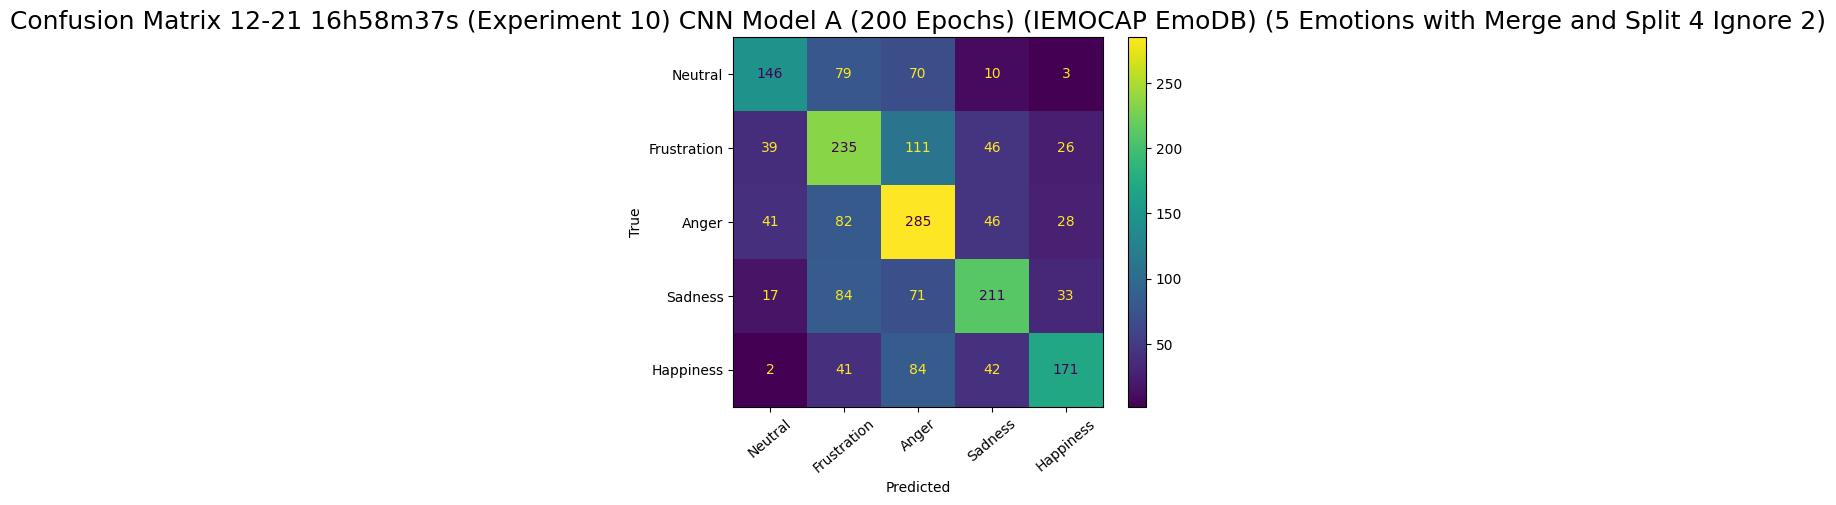

In [5]:
def experiment10(data, experimentName, trainName, validName):
  resultDir = os.path.join(resultFolder, experimentName)
  logDir = os.path.join(logFolder, experimentName)
  evaluation = Evaluation(data, resultDir, logDir)
  evaluation.evaluateAll(trainName, validName)

experimentName = '12-21 16h58m37s (Experiment 10) CNN Model A (200 Epochs) (IEMOCAP EmoDB) (5 Emotions with Merge and Split 4 Ignore 2)'
trainName = 'events.out.tfevents.1671613121.gpu-comp-105.1908.2.v2'
validName = 'events.out.tfevents.1671613126.gpu-comp-105.1908.3.v2'
experiment10(mixDataModel5LabelsSplit4Ignore2, experimentName, trainName, validName)

## Experiment 11 (CNN Model B, 200 Epochs, IEMOCAP & EmoDB, 5 Emotions with Merge and Split 4 Ignore 2)

In [ ]:
labelsToInclude = ['Neutral', 'Frustration', 'Anger', 'Sadness', 'Happiness']
mergeHappinessExcitement = True
splitDuration = 4
ignoreDuration = 2

mixDataModel5LabelsSplit4Ignore2 = DataModel(labelsToInclude=labelsToInclude,
                                              mergeHappinessExcitement=mergeHappinessExcitement,
                                              splitDuration=splitDuration,
                                              ignoreDuration=ignoreDuration)
mixDataModel5LabelsSplit4Ignore2.extractIEMOCAPData()
mixDataModel5LabelsSplit4Ignore2.extractEmoDBData()
mixDataModel5LabelsSplit4Ignore2.processData()

Load model from /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_TrainedModel/12-22 12h36m27s (Experiment 11) CNN Model B (200 Epochs) (IEMOCAP EmoDB) (5 Emotions with Merge and Split 4 Ignore 2) (00001 lr 0001 decay)

Start prediction...

Prediction Completed
    Number of results: 2003


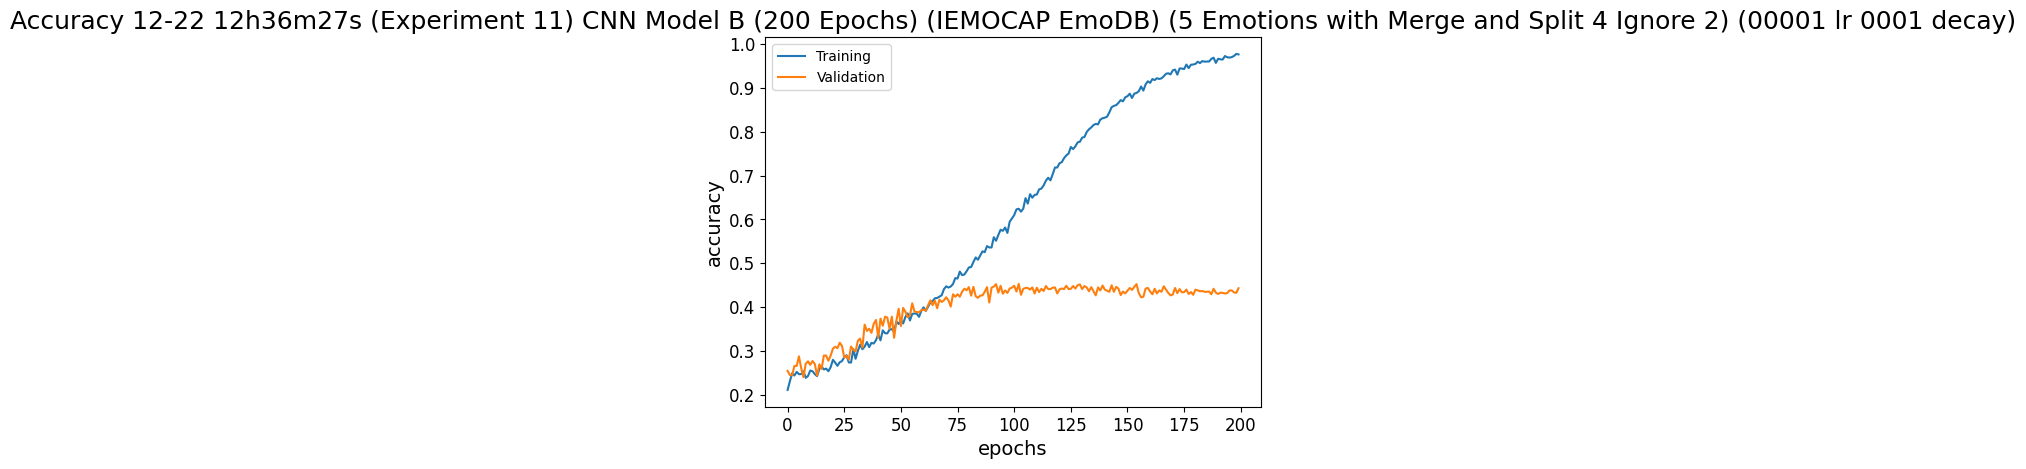

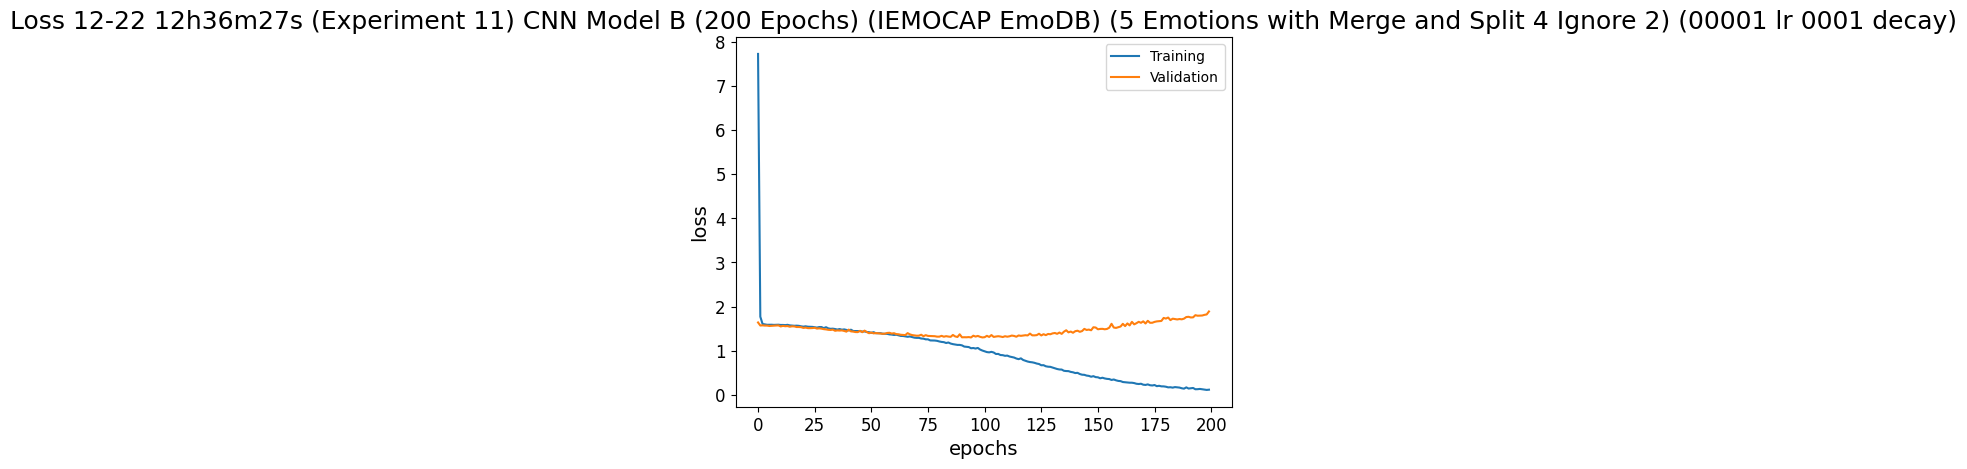

              precision    recall  f1-score   support

           0       0.60      0.50      0.54       308
           1       0.48      0.54      0.51       457
           2       0.54      0.50      0.52       482
           3       0.49      0.58      0.53       416
           4       0.65      0.56      0.60       340

    accuracy                           0.54      2003
   macro avg       0.55      0.54      0.54      2003
weighted avg       0.54      0.54      0.54      2003



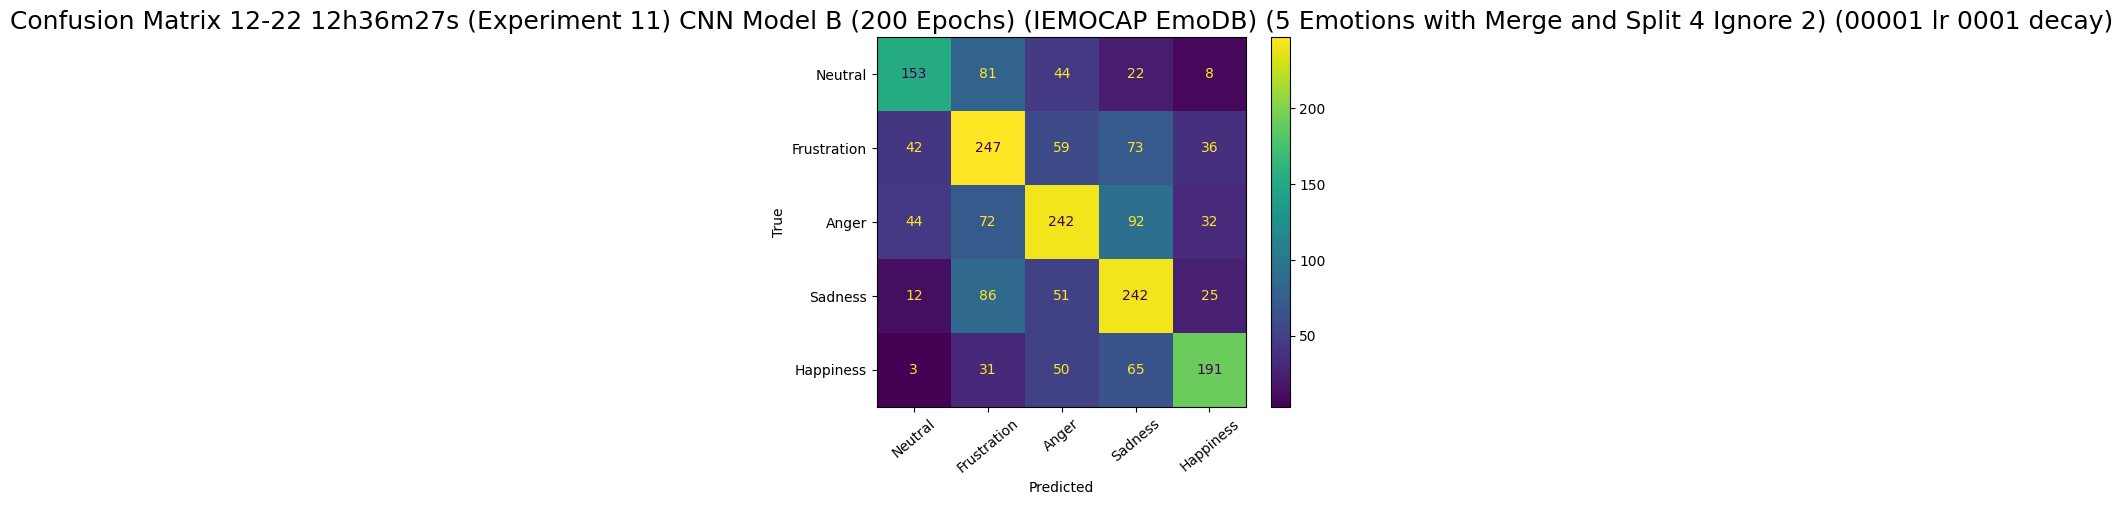

In [6]:
def experiment11(data, experimentName, trainName, validName):
  resultDir = os.path.join(resultFolder, experimentName)
  logDir = os.path.join(logFolder, experimentName)
  evaluation = Evaluation(data, resultDir, logDir)
  evaluation.evaluateAll(trainName, validName)

experimentName = '12-22 12h36m27s (Experiment 11) CNN Model B (200 Epochs) (IEMOCAP EmoDB) (5 Emotions with Merge and Split 4 Ignore 2) (00001 lr 0001 decay)'
trainName = 'events.out.tfevents.1671683790.gpu-comp-103.10805.2.v2'
validName = 'events.out.tfevents.1671683796.gpu-comp-103.10805.3.v2'
experiment11(mixDataModel5LabelsSplit4Ignore2, experimentName, trainName, validName)

## Experiment 12 (CNN Model B, 200 Epochs, IEMOCAP & EmoDB, Aug 2A, 5 Emotions with Merge and Split 4 Ignore 2)

In [5]:
labelsToInclude = ['Neutral', 'Frustration', 'Anger', 'Sadness', 'Happiness']
mergeHappinessExcitement = True
splitDuration = 4
ignoreDuration = 2

mixDataModel5LabelsSplit4Ignore2Aug2A = DataModel(labelsToInclude=labelsToInclude,
                                                  mergeHappinessExcitement=mergeHappinessExcitement,
                                                  splitDuration=splitDuration,
                                                  ignoreDuration=ignoreDuration)
mixDataModel5LabelsSplit4Ignore2Aug2A.extractIEMOCAPData()
mixDataModel5LabelsSplit4Ignore2Aug2A.extractEmoDBData()
mixDataModel5LabelsSplit4Ignore2Aug2A.processTestingDataOnly()

Loading and Extracting IEMOCAP Data...
    Loaded and Extracted  7380 data

Data Extration Completed
    Number of data: 7380
      Neutral     : 1708
      Frustration : 1849
      Anger       : 1103
      Sadness     : 1084
      Happiness   : 1636
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0
      Boredom     : 0

Loading and Extracting EmoDB Data...
    Loaded and Extracted   408 data

Data Extration Completed
    Number of data: 7788
      Neutral     : 1787
      Frustration : 1918
      Anger       : 1230
      Sadness     : 1146
      Happiness   : 1707
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0
      Boredom     : 0

Splitting data...
Train Test Split Completed
    Training Size : 6288
    Testing Size  : 1500

Split or Add Padding for testing data
    Split Duration  : 4
    Ignore Duration : 2
Processing...
    Processed  1947 data split and padding
Data Splitting and Padding For Testing 

Load model from /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_TrainedModel/12-24 21h00m19s (Experiment 12) CNN Model B (200 Epochs) (IEMOCAP EmoDB) (Data Aug 2A) (5 Emotions with Merge and Split 4 Ignore 2) (00001 lr 0001 decay)


2022-12-24 22:00:07.611252: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Start prediction...

Prediction Completed
    Number of results: 1947


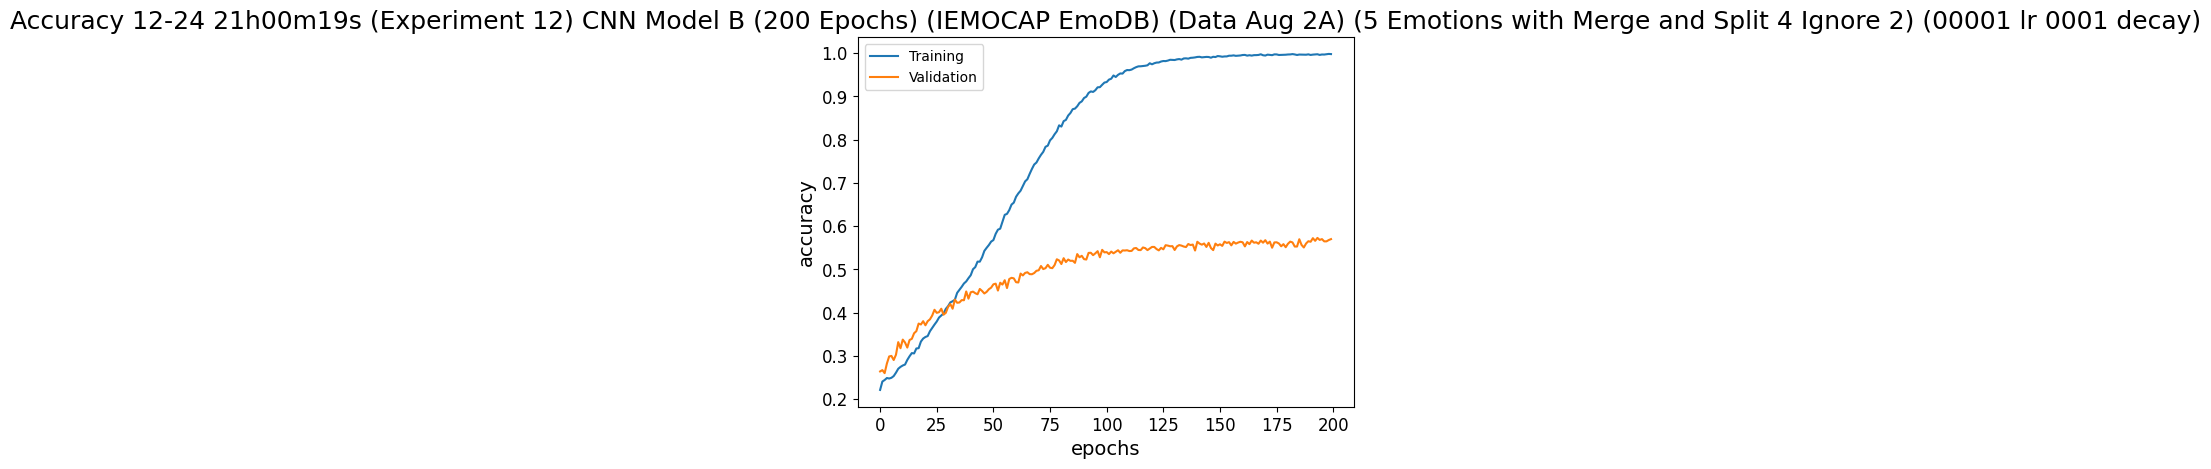

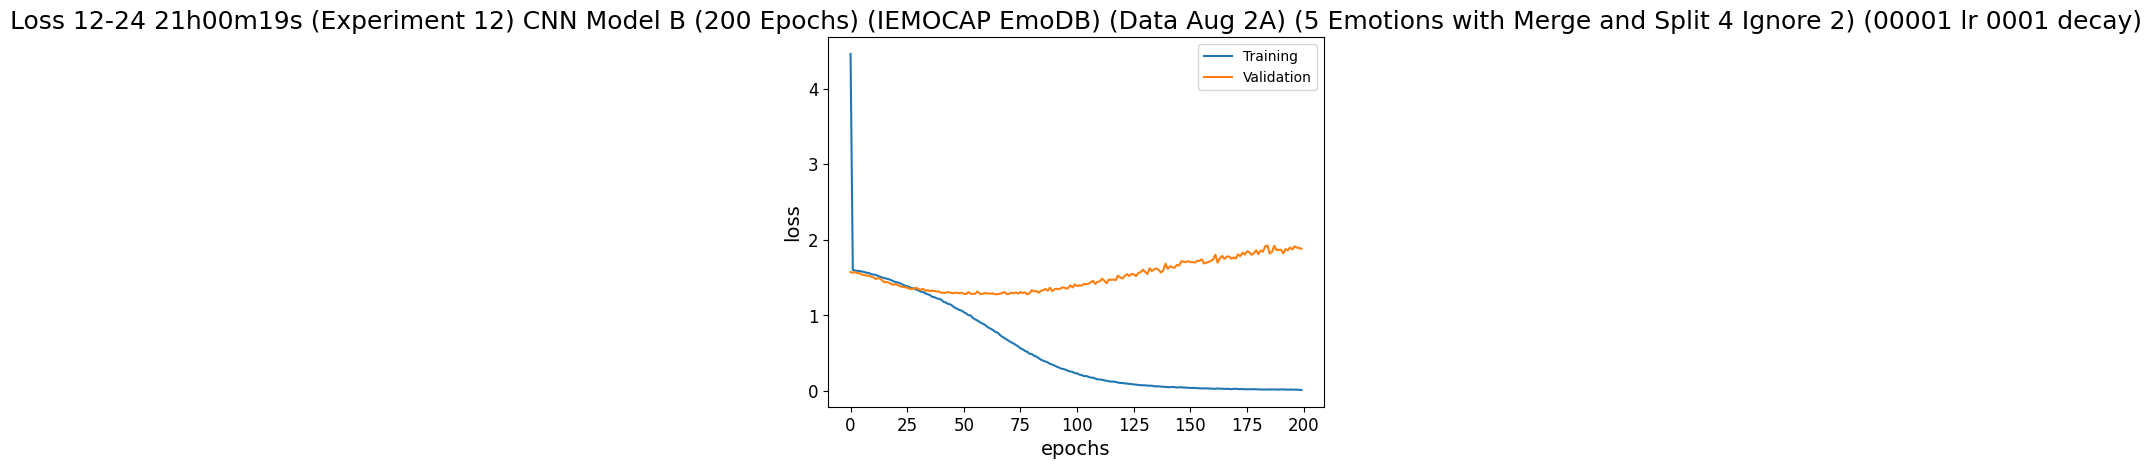

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       285
           1       0.89      0.89      0.89       448
           2       0.91      0.89      0.90       421
           3       0.90      0.90      0.90       420
           4       0.92      0.91      0.91       373

    accuracy                           0.90      1947
   macro avg       0.90      0.90      0.90      1947
weighted avg       0.90      0.90      0.90      1947



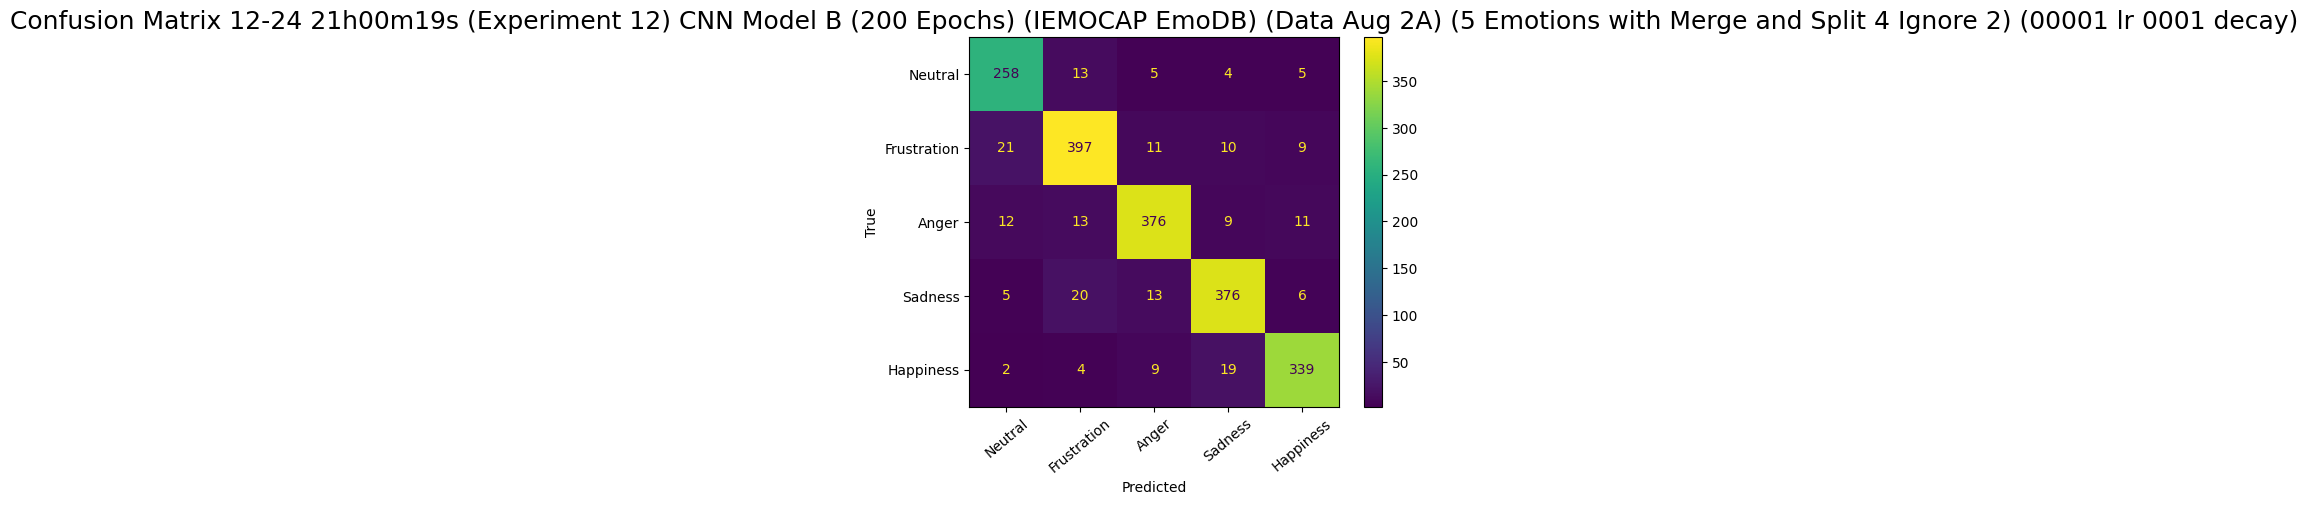

In [4]:
def experiment12(data, experimentName, trainName, validName):
  resultDir = os.path.join(resultFolder, experimentName)
  logDir = os.path.join(logFolder, experimentName)
  evaluation = Evaluation(data, resultDir, logDir)
  evaluation.evaluateAll(trainName, validName)

experimentName = '12-24 21h00m19s (Experiment 12) CNN Model B (200 Epochs) (IEMOCAP EmoDB) (Data Aug 2A) (5 Emotions with Merge and Split 4 Ignore 2) (00001 lr 0001 decay)'
trainName = 'events.out.tfevents.1671886828.gpu-comp-201.27876.0.v2'
validName = 'events.out.tfevents.1671886841.gpu-comp-201.27876.1.v2'
experiment12(mixDataModel5LabelsSplit4Ignore2Aug2A, experimentName, trainName, validName)

## Experiment 13 (CNN Model B, 200 Epochs, IEMOCAP & EmoDB, Aug 3A, 5 Emotions with Merge and Split 4 Ignore 2)

In [6]:
labelsToInclude = ['Neutral', 'Frustration', 'Anger', 'Sadness', 'Happiness']
mergeHappinessExcitement = True
splitDuration = 4
ignoreDuration = 2

mixDataModel5LabelsSplit4Ignore2Aug3A = DataModel(labelsToInclude=labelsToInclude,
                                                  mergeHappinessExcitement=mergeHappinessExcitement,
                                                  splitDuration=splitDuration,
                                                  ignoreDuration=ignoreDuration)
mixDataModel5LabelsSplit4Ignore2Aug3A.extractIEMOCAPData()
mixDataModel5LabelsSplit4Ignore2Aug3A.extractEmoDBData()
mixDataModel5LabelsSplit4Ignore2Aug3A.processTestingDataOnly()

Loading and Extracting IEMOCAP Data...
    Loaded and Extracted  7380 data

Data Extration Completed
    Number of data: 7380
      Neutral     : 1708
      Frustration : 1849
      Anger       : 1103
      Sadness     : 1084
      Happiness   : 1636
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0
      Boredom     : 0

Loading and Extracting EmoDB Data...
    Loaded and Extracted   408 data

Data Extration Completed
    Number of data: 7788
      Neutral     : 1787
      Frustration : 1918
      Anger       : 1230
      Sadness     : 1146
      Happiness   : 1707
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0
      Boredom     : 0

Splitting data...
Train Test Split Completed
    Training Size : 6288
    Testing Size  : 1500

Split or Add Padding for testing data
    Split Duration  : 4
    Ignore Duration : 2
Processing...
    Processed  1947 data split and padding
Data Splitting and Padding For Testing 

Load model from /Users/alexto/Documents/Programming/HKU/FYP/Speech Emotion Recognition/IEMOCAP_TrainedModel/12-24 22h45m59s (Experiment 13) CNN Model B (200 Epochs) (IEMOCAP EmoDB) (Data Aug 3A) (5 Emotions with Merge and Split 4 Ignore 2) (00001 lr 0001 decay)

Start prediction...

Prediction Completed
    Number of results: 1947


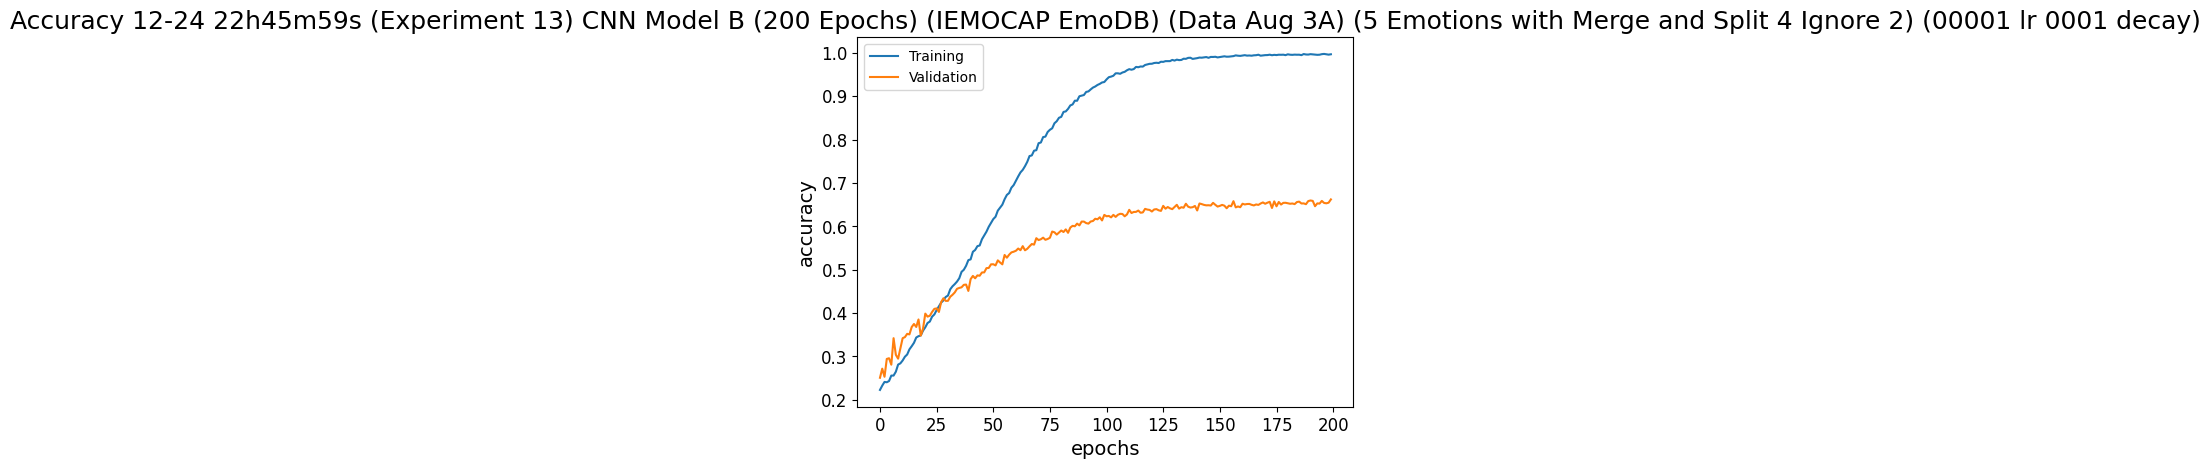

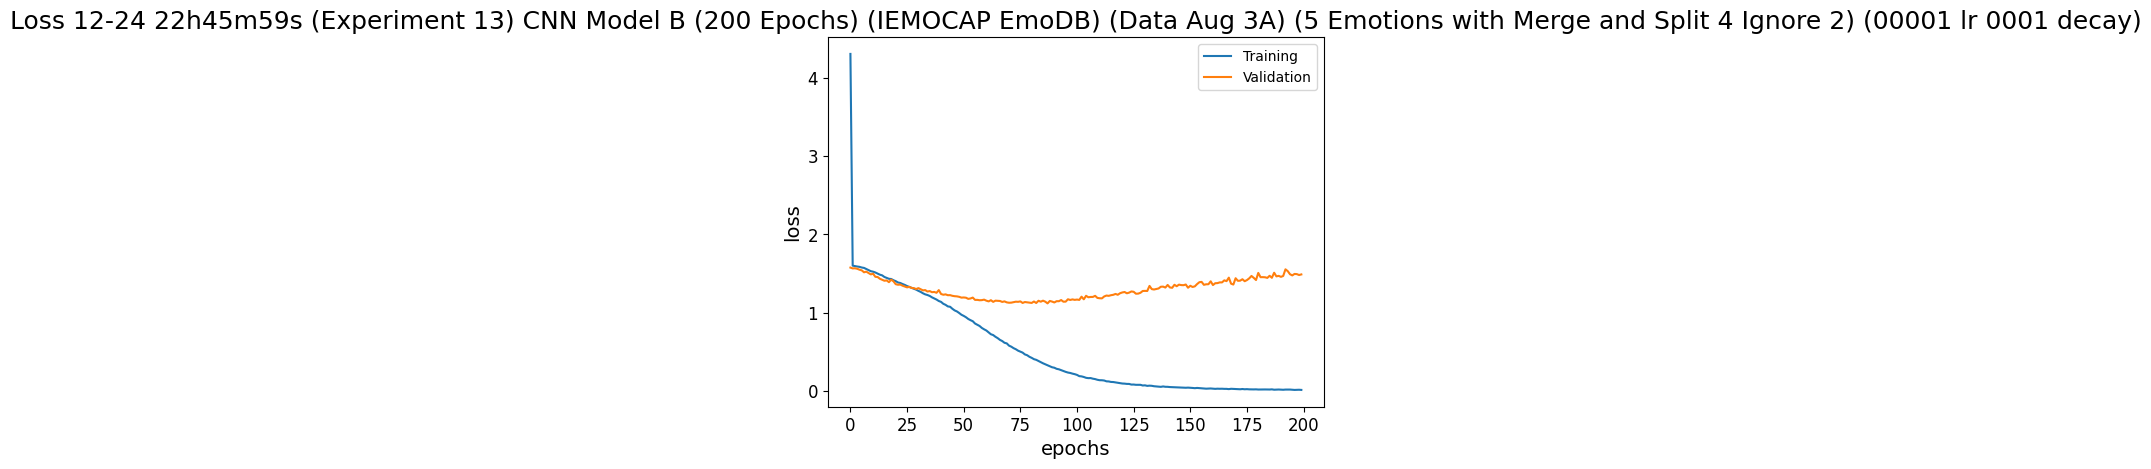

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       285
           1       0.89      0.90      0.89       448
           2       0.91      0.88      0.90       421
           3       0.89      0.89      0.89       420
           4       0.93      0.91      0.92       373

    accuracy                           0.90      1947
   macro avg       0.90      0.90      0.90      1947
weighted avg       0.90      0.90      0.90      1947



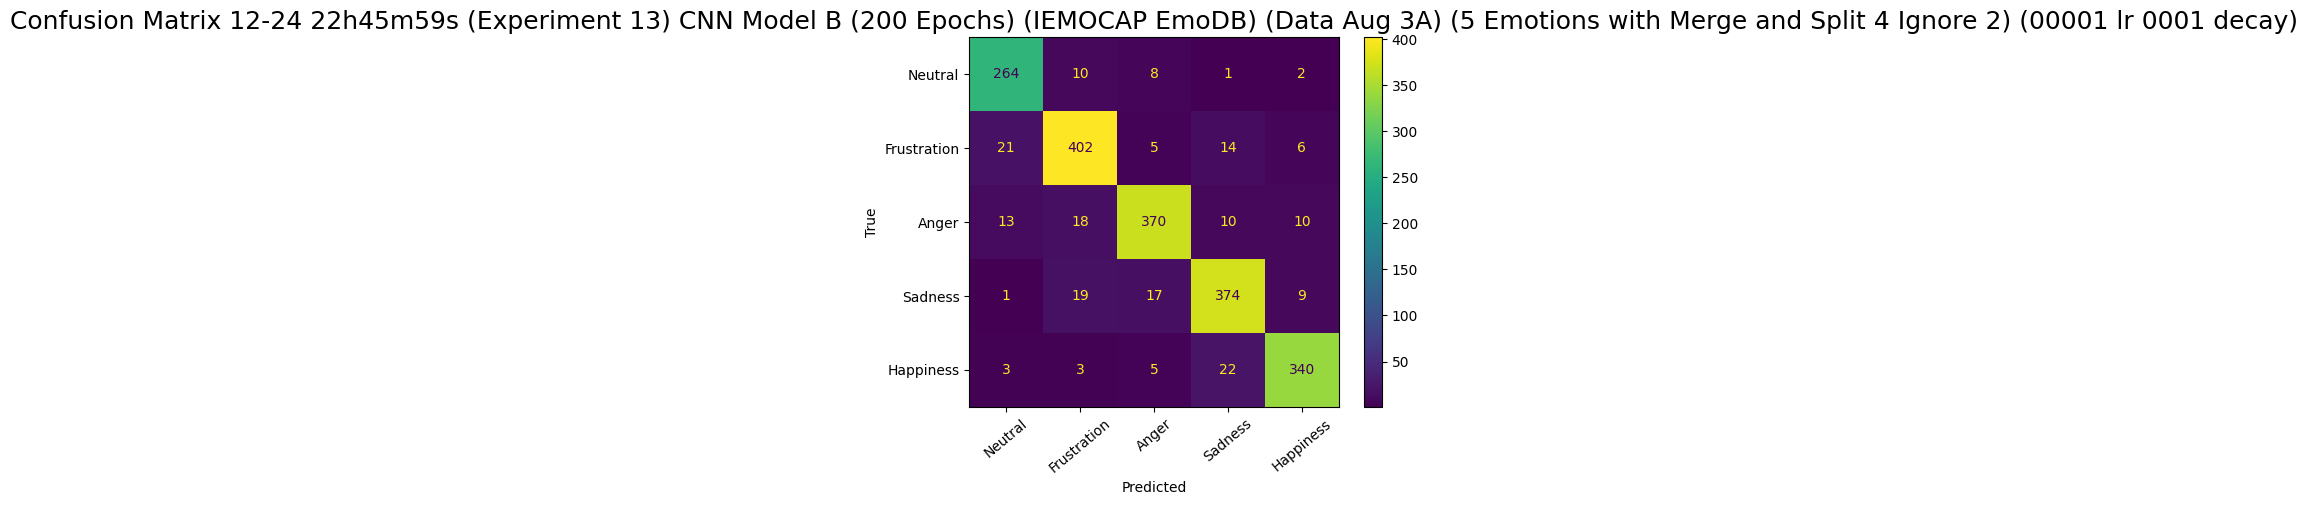

In [7]:
def experiment13(data, experimentName, trainName, validName):
  resultDir = os.path.join(resultFolder, experimentName)
  logDir = os.path.join(logFolder, experimentName)
  evaluation = Evaluation(data, resultDir, logDir)
  evaluation.evaluateAll(trainName, validName)

experimentName = '12-24 22h45m59s (Experiment 13) CNN Model B (200 Epochs) (IEMOCAP EmoDB) (Data Aug 3A) (5 Emotions with Merge and Split 4 Ignore 2) (00001 lr 0001 decay)'
trainName = 'events.out.tfevents.1671893172.gpu-comp-201.31906.0.v2'
validName = 'events.out.tfevents.1671893189.gpu-comp-201.31906.1.v2'
experiment13(mixDataModel5LabelsSplit4Ignore2Aug3A, experimentName, trainName, validName)